In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# metadata
print(chronic_kidney_disease.metadata)

# variable information
print(chronic_kidney_disease.variables)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

## **Data Exploration **

---



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.DataFrame(X)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [4]:
import pandas as pd

# Identify columns with object data type
object_cols = df.select_dtypes(include=['object']).columns

# Display value counts for each object column
for col in object_cols:
    print(f"Value counts for column '{col}':")
    print(df[col].value_counts())
    print("\n")


Value counts for column 'rbc':
rbc
normal      201
abnormal     47
Name: count, dtype: int64


Value counts for column 'pc':
pc
normal      259
abnormal     76
Name: count, dtype: int64


Value counts for column 'pcc':
pcc
notpresent    354
present        42
Name: count, dtype: int64


Value counts for column 'ba':
ba
notpresent    374
present        22
Name: count, dtype: int64


Value counts for column 'htn':
htn
no     251
yes    147
Name: count, dtype: int64


Value counts for column 'dm':
dm
no      260
yes     137
\tno      1
Name: count, dtype: int64


Value counts for column 'cad':
cad
no     364
yes     34
Name: count, dtype: int64


Value counts for column 'appet':
appet
good    317
poor     82
Name: count, dtype: int64


Value counts for column 'pe':
pe
no     323
yes     76
Name: count, dtype: int64


Value counts for column 'ane':
ane
no     339
yes     60
Name: count, dtype: int64




### Label Encoding is required to convert the object data type to numeric data type.

---



In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Identify columns with object data type
object_cols = df.select_dtypes(include=['object']).columns

# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Encode each object column
for col in object_cols:
    # Remove any whitespace from values in the column
    df[col] = df[col].str.strip()
    # Apply label encoding to each column
    df[col] = label_encoder.fit_transform(df[col])

# Display the first few rows of the DataFrame to verify encoding
print(df.head())

    age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo   pcv  \
0  48.0  80.0  1.020  1.0  0.0    2   1    0   0  121.0  ...  15.4  44.0   
1   7.0  50.0  1.020  4.0  0.0    2   1    0   0    NaN  ...  11.3  38.0   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...   9.6  31.0   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  11.2  32.0   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  11.6  35.0   

     wbcc  rbcc  htn  dm  cad  appet  pe  ane  
0  7800.0   5.2    1   1    0      0   0    0  
1  6000.0   NaN    0   0    0      0   0    0  
2  7500.0   NaN    0   1    0      1   0    1  
3  6700.0   3.9    1   0    0      1   1    1  
4  7300.0   4.6    0   0    0      0   0    0  

[5 rows x 24 columns]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    int64  
 6   pc      400 non-null    int64  
 7   pcc     400 non-null    int64  
 8   ba      400 non-null    int64  
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     400 non-null    int64  
 19  dm      400 non-null    int64  
 20  cad     400 non-null    int64  
 21  appet   400 non-null    int64  
 22  pe

<Axes: >

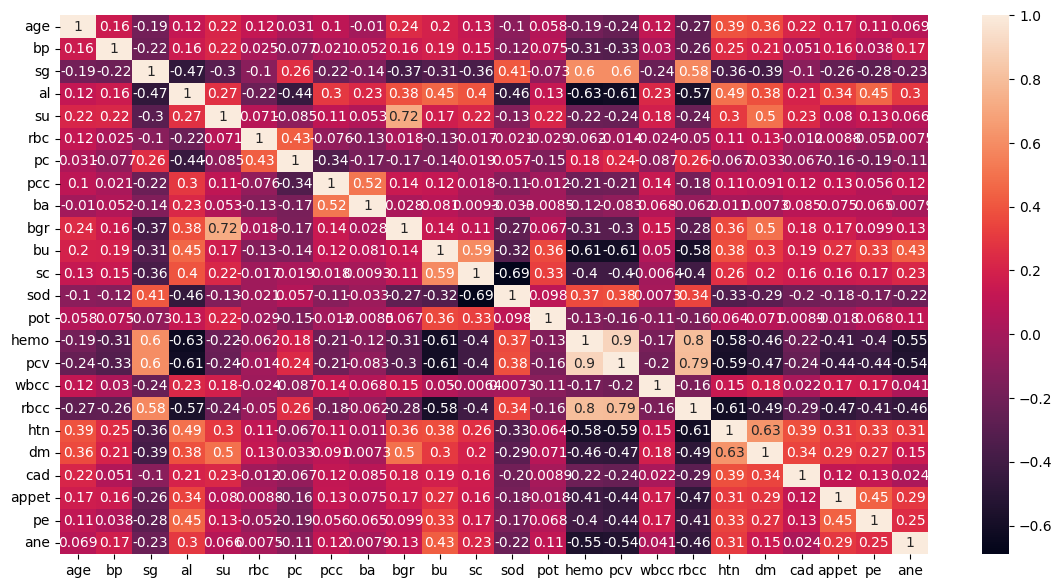

In [7]:
#To understand correlation between variables
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(), annot = True)

# Now we will drop the features with correraltion value grater than 0.80 to avoid high multicolinearity.

In [8]:
import pandas as pd
import numpy as np


# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr().abs()

# Create a mask to ignore the upper triangle of the matrix
upper_triangle_mask = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation greater than 0.8
high_corr_features = [column for column in upper_triangle_mask.columns if any(upper_triangle_mask[column] > 0.8)]

print("Highly Correlated Features (correlation > 0.8):")
print(high_corr_features)

# Drop the highly correlated features from the DataFrame
df_reduced = df.drop(columns=high_corr_features)

print("\nShape of the original DataFrame:")
print(df.shape)

print("\nShape of the DataFrame after removing highly correlated features:")
print(df_reduced.shape)

print("\nDataFrame after removing highly correlated features:")
print(df_reduced.head())

Highly Correlated Features (correlation > 0.8):
['pcv']

Shape of the original DataFrame:
(400, 24)

Shape of the DataFrame after removing highly correlated features:
(400, 23)

DataFrame after removing highly correlated features:
    age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  pot  hemo  \
0  48.0  80.0  1.020  1.0  0.0    2   1    0   0  121.0  ...  NaN  15.4   
1   7.0  50.0  1.020  4.0  0.0    2   1    0   0    NaN  ...  NaN  11.3   
2  62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...  NaN   9.6   
3  48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  2.5  11.2   
4  51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  NaN  11.6   

     wbcc  rbcc  htn  dm  cad  appet  pe  ane  
0  7800.0   5.2    1   1    0      0   0    0  
1  6000.0   NaN    0   0    0      0   0    0  
2  7500.0   NaN    0   1    0      1   0    1  
3  6700.0   3.9    1   0    0      1   1    1  
4  7300.0   4.6    0   0    0      0   0    0  

[5 rows x 23 columns]


# Now we will check the features with null values and try to deal with it.:




In [9]:
df_reduced.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,0
pc,0
pcc,0
ba,0
bgr,44


# We will drop the features with missing value percentage greater than 25 as it will unnecessary create the bias in the data points.

In [10]:
null_percentage = df_reduced.isnull().mean() * 100
null_percentage_df = pd.DataFrame(null_percentage, columns=['Percentage of Null Values'])
print(null_percentage_df)
high_null_columns = null_percentage_df[null_percentage_df['Percentage of Null Values'] >= 25]
print("\n"+ "*"*100 + "\n")
print(high_null_columns)
print("\n"+ "*"*100 + "\n")
columns_to_drop = high_null_columns.index.tolist()

# Drop the columns from the original DataFrame
df_cleaned = df_reduced.drop(columns=columns_to_drop)

# Print the cleaned DataFrame
print(df_cleaned)

       Percentage of Null Values
age                         2.25
bp                          3.00
sg                         11.75
al                         11.50
su                         12.25
rbc                         0.00
pc                          0.00
pcc                         0.00
ba                          0.00
bgr                        11.00
bu                          4.75
sc                          4.25
sod                        21.75
pot                        22.00
hemo                       13.00
wbcc                       26.50
rbcc                       32.75
htn                         0.00
dm                          0.00
cad                         0.00
appet                       0.00
pe                          0.00
ane                         0.00

****************************************************************************************************

      Percentage of Null Values
wbcc                      26.50
rbcc                      32.75

********

we will use kde plot to see the distribution of the data points.

between -0.5 & 0.5, the data are nearly symmetrical.

between -1 & -0.5 (negative/left skewed) or between 0.5 & 1(positive/right skewed), the data are slightly skewed

lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed

skewness value of age is -0.6682594691593559


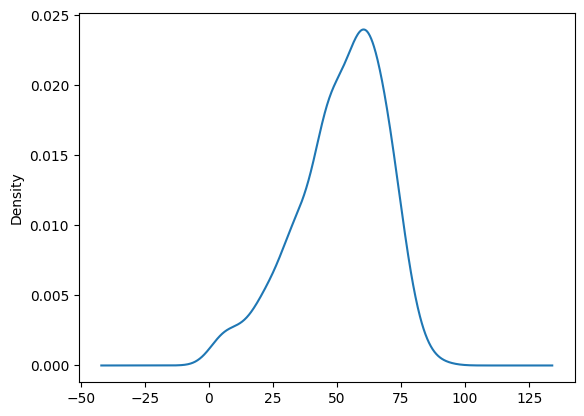

skewness value of bp is 1.6054289569770592


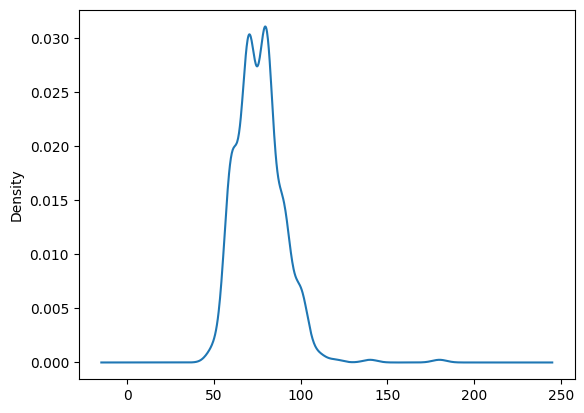

skewness value of sg is -0.1724437507086711


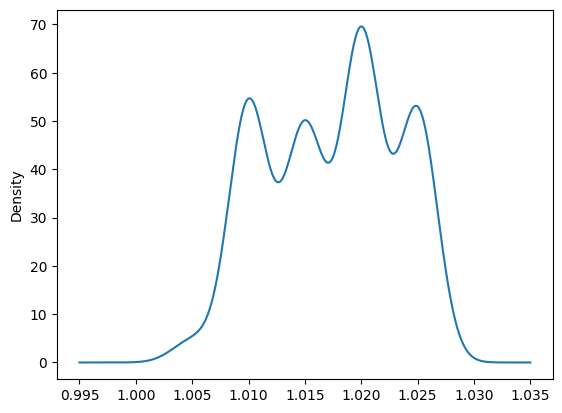

skewness value of al is 0.9981572420526745


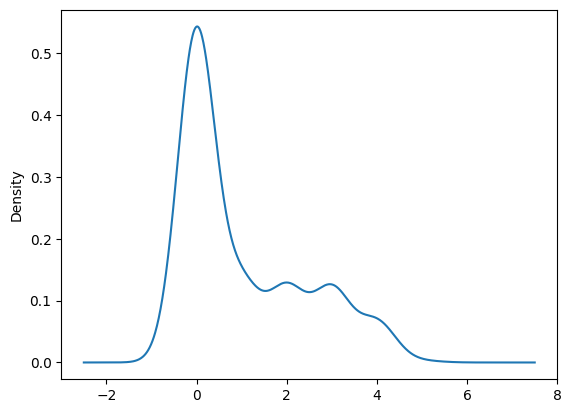

skewness value of su is 2.464261823398267


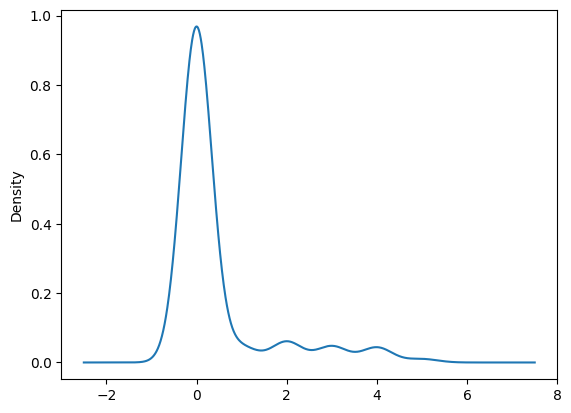

skewness value of rbc is -0.3330732938752494


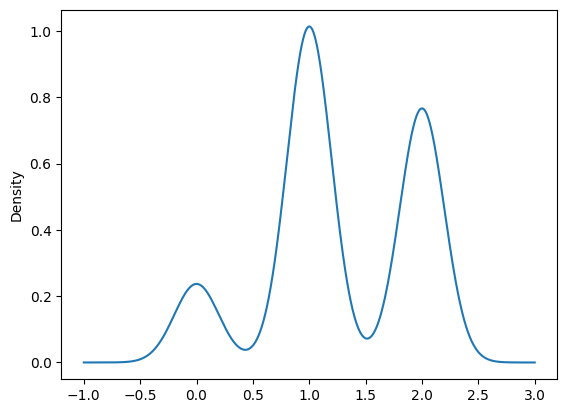

skewness value of pc is 0.007408282870728626


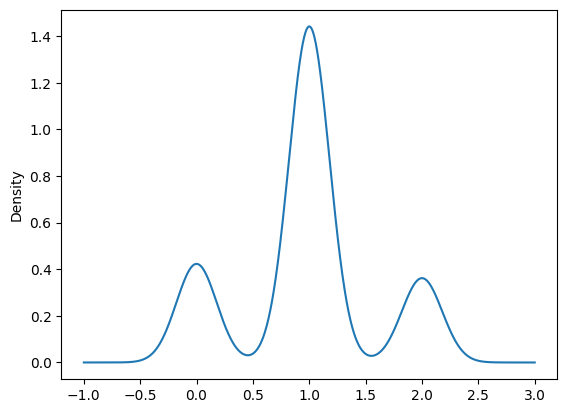

skewness value of pcc is 2.901890392880522


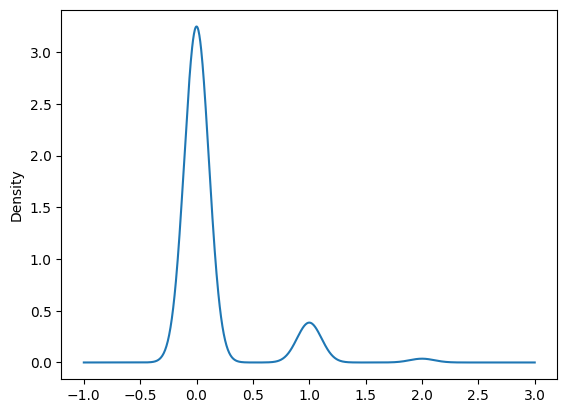

skewness value of ba is 4.300275002237998


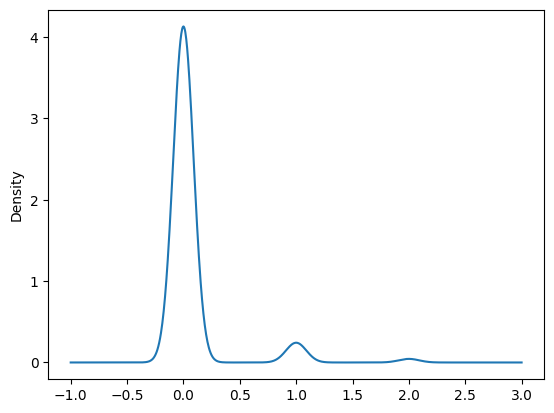

skewness value of bgr is 2.010773172514955


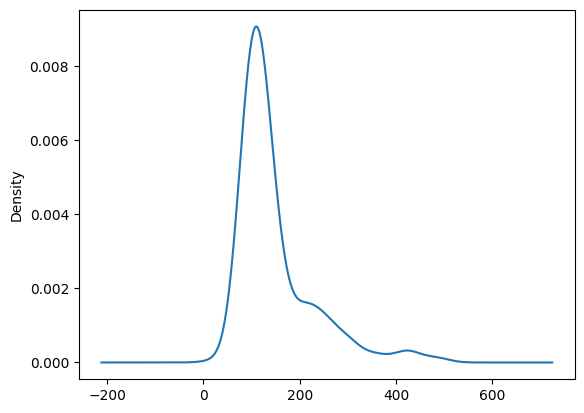

skewness value of bu is 2.6343744585903863


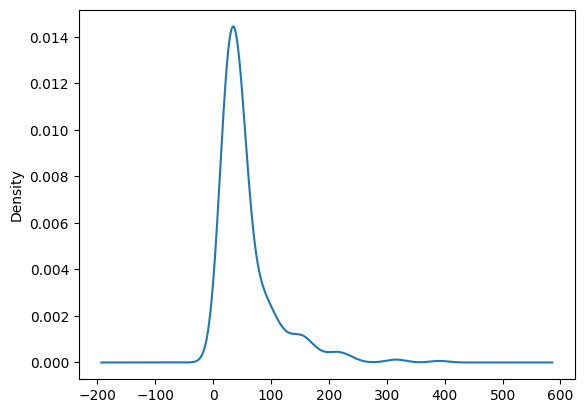

skewness value of sc is 7.509538252140634


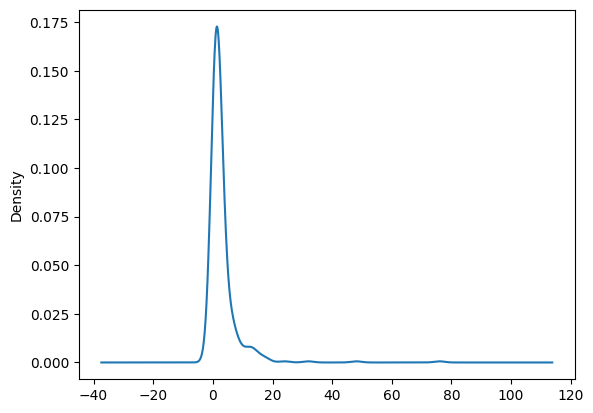

skewness value of sod is -6.996568560937047


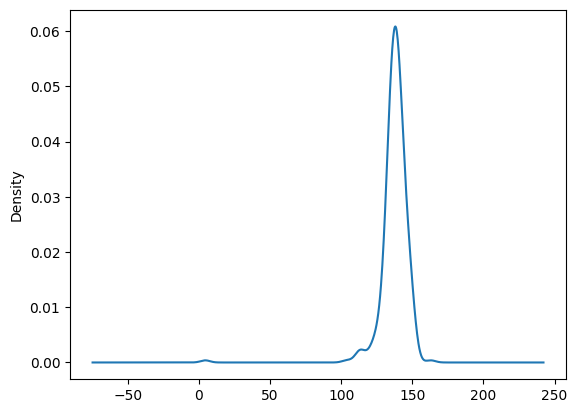

skewness value of pot is 11.582955561754394


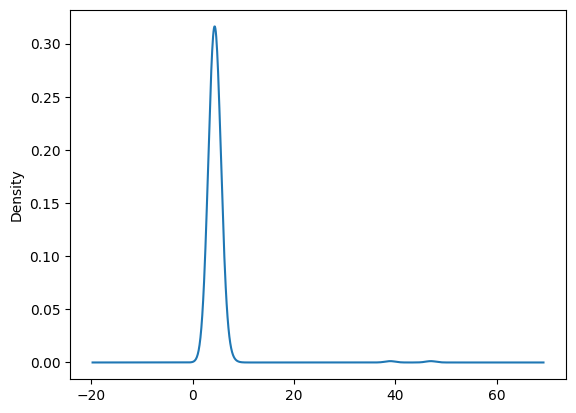

skewness value of hemo is -0.3350946791593011


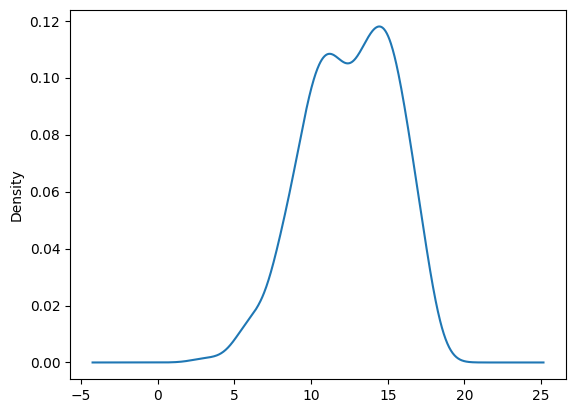

skewness value of htn is 0.6311491329801214


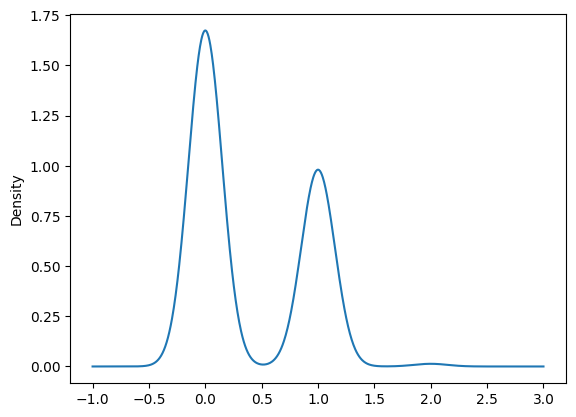

skewness value of dm is 0.748867794007701


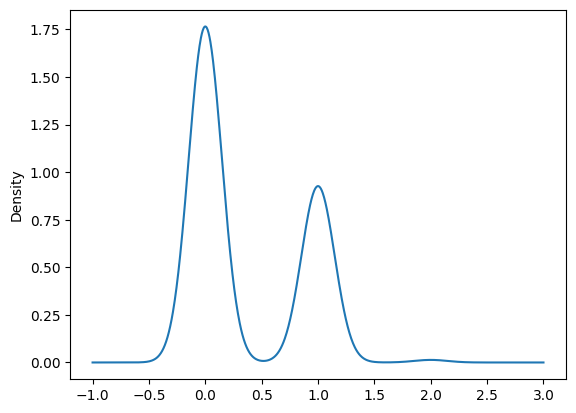

skewness value of cad is 3.2675749527522253


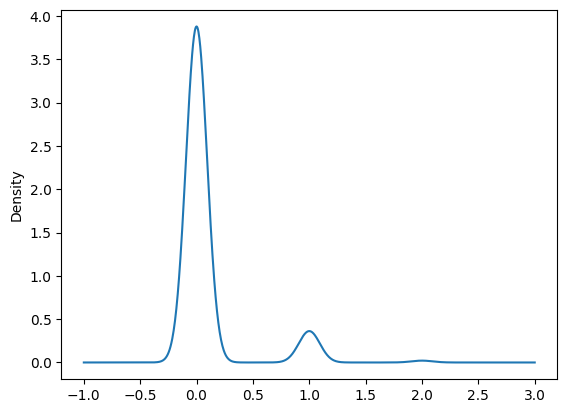

skewness value of appet is 1.5354421769101894


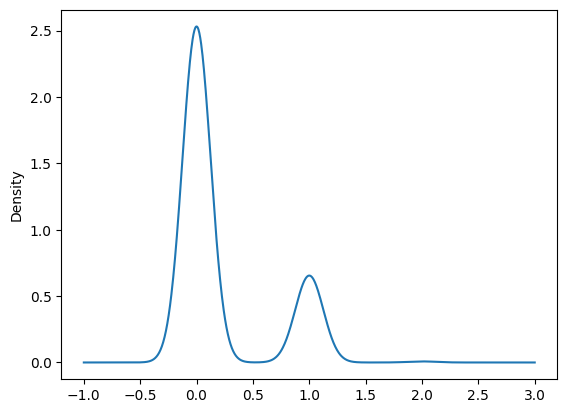

skewness value of pe is 1.6603513010689679


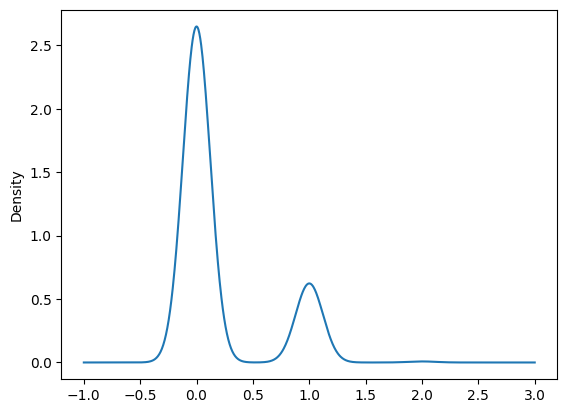

skewness value of ane is 2.0629242628629685


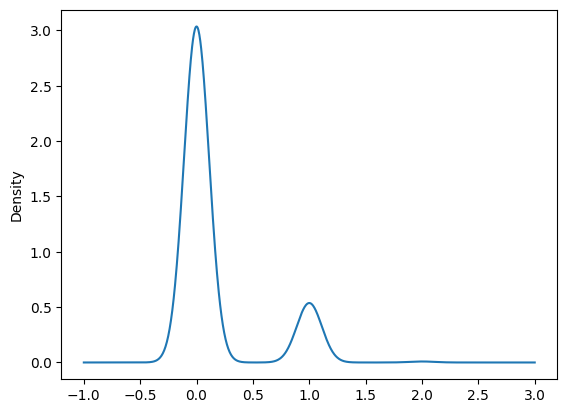

In [11]:
for col in df_cleaned.columns:
    if (df_cleaned[col].dtype == 'float' or 'int64'):
        print(f'skewness value of {col} is {df_cleaned[col].skew()}')
        df_cleaned[col].plot.kde()
        plt.show()

Now let's handle missing as well as outliers values in the dataset.
We will use quartile bond with value 25% and 75% against the tradition of using 20% and 80% to avoid losing inportant data as the dataset is not vast.
For numeric data we will go for Mean and Median as wherever we see the high outliers, we will use Median else go for mean. Where in the categorical features we simply prefer the inputing by mode.

In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

# Define the IQR method to detect outliers
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.where((data < lower_bound) | (data > upper_bound))

# Identify columns with outliers
def identify_columns_with_outliers(df, columns):
    columns_with_outliers = []
    for column in columns:
        if len(detect_outliers_iqr(df[column].dropna())) > 0:
            columns_with_outliers.append(column)
    return columns_with_outliers

# Columns
numerical_cols = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
categorical_cols = [ 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Identify numerical columns with outliers
columns_with_outliers = identify_columns_with_outliers(df_cleaned, numerical_cols)

# Mean/Median imputation based on the presence of outliers
for column in numerical_cols:
    if column in columns_with_outliers:
        imputer = SimpleImputer(strategy='median')
    else:
        imputer = SimpleImputer(strategy='mean')
    df_cleaned[[column]] = imputer.fit_transform(df_cleaned[[column]])

# Mode imputation for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_cols] = mode_imputer.fit_transform(df_cleaned[categorical_cols])

# Verify that there are no null values left
print(df_cleaned.isnull().sum())


age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64


After all this preprocessing let's have look at the updated skewness.

skewness value of age is -0.6887359269909011


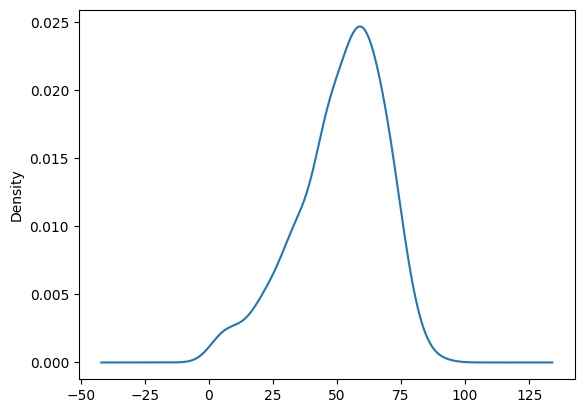

skewness value of bp is 1.6018577948870523


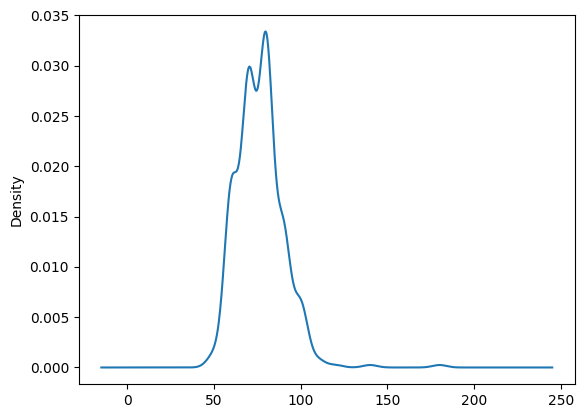

skewness value of sg is -0.33332000813463664


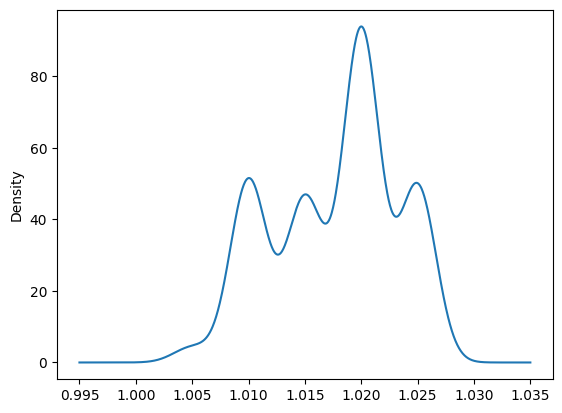

skewness value of al is 1.1800875289466923


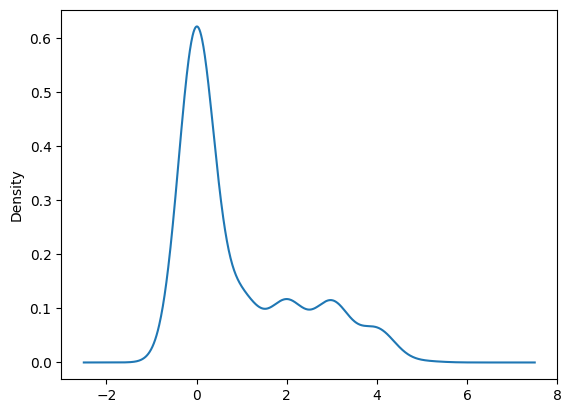

skewness value of su is 2.700054982524921


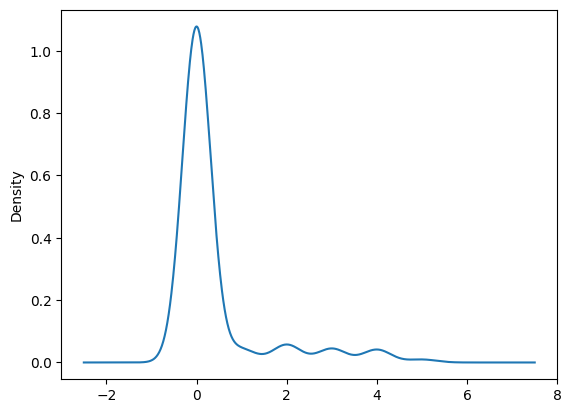

skewness value of rbc is -0.3330732938752494


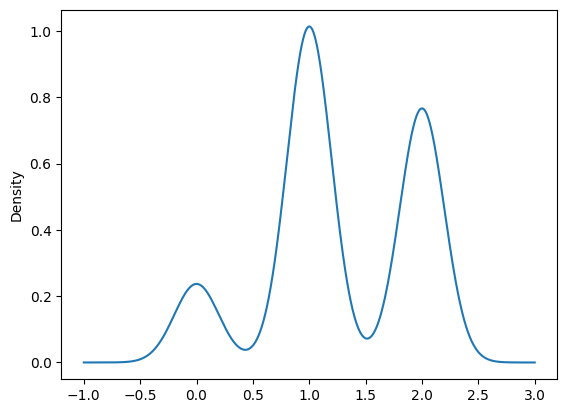

skewness value of pc is 0.007408282870728626


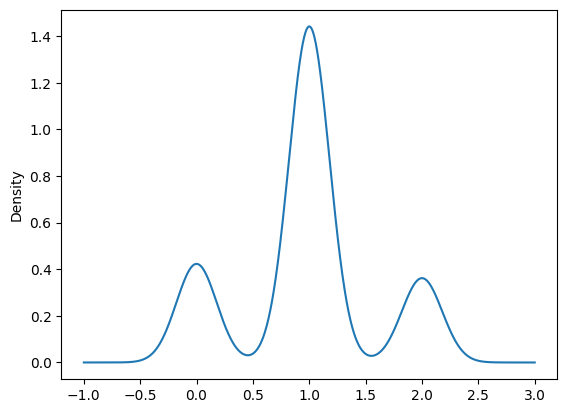

skewness value of pcc is 2.901890392880522


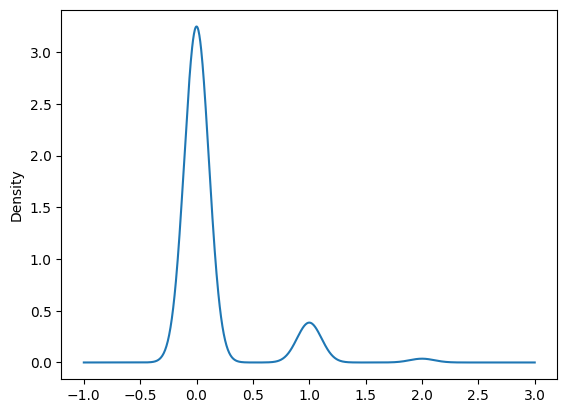

skewness value of ba is 4.300275002237998


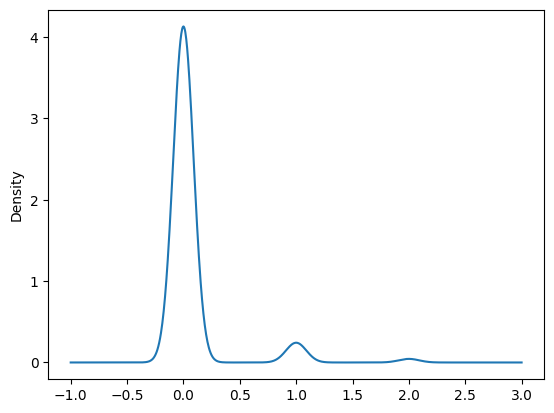

skewness value of bgr is 2.2041428509602166


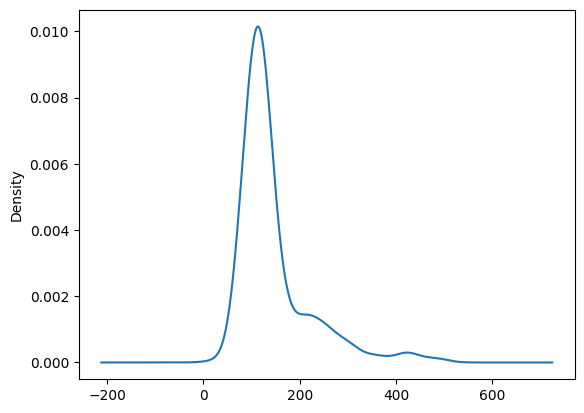

skewness value of bu is 2.7241378338756803


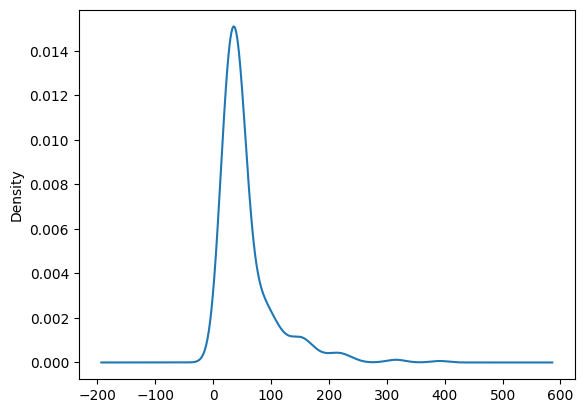

skewness value of sc is 7.665610161599991


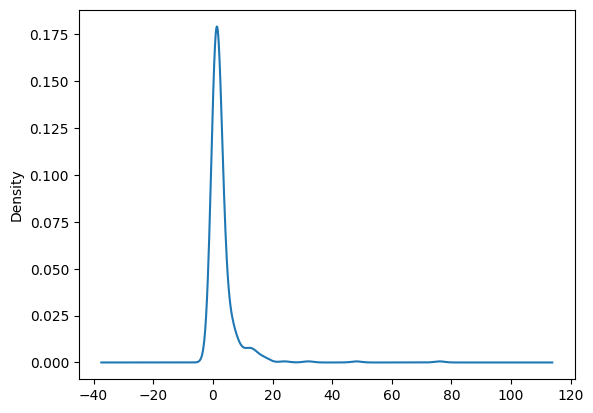

skewness value of sod is -7.929335584027159


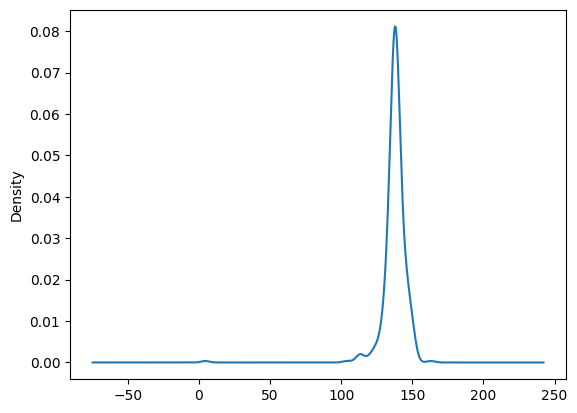

skewness value of pot is 13.132547759481927


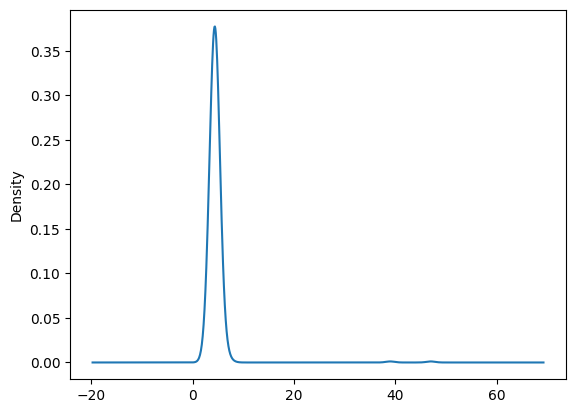

skewness value of hemo is -0.37674704830424277


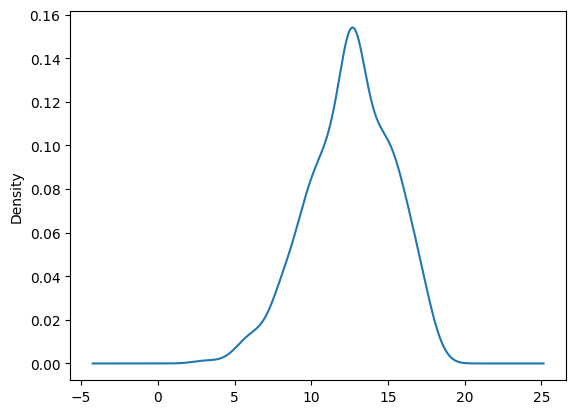

skewness value of htn is 0.6311491329801214


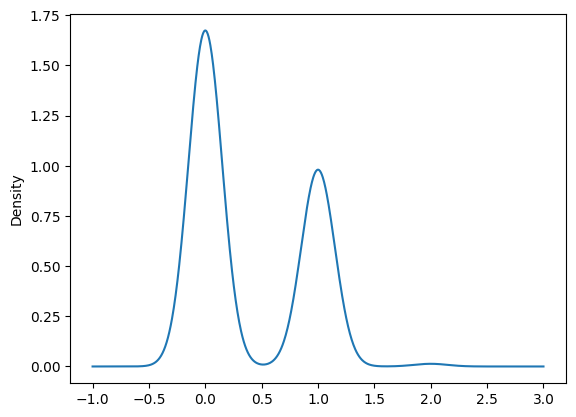

skewness value of dm is 0.748867794007701


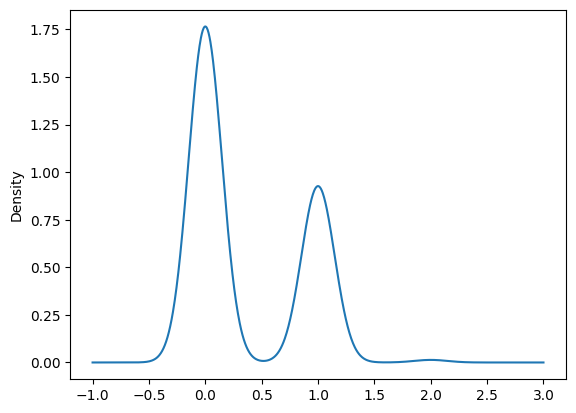

skewness value of cad is 3.2675749527522253


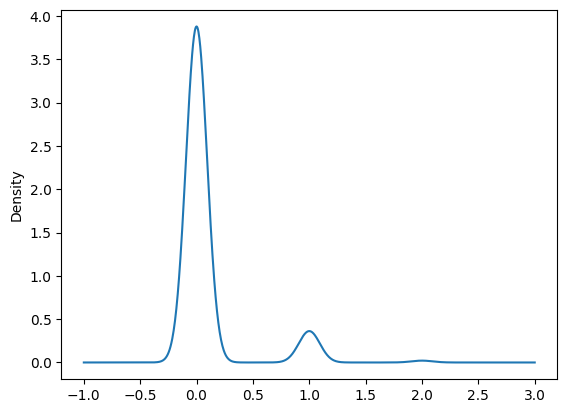

skewness value of appet is 1.5354421769101894


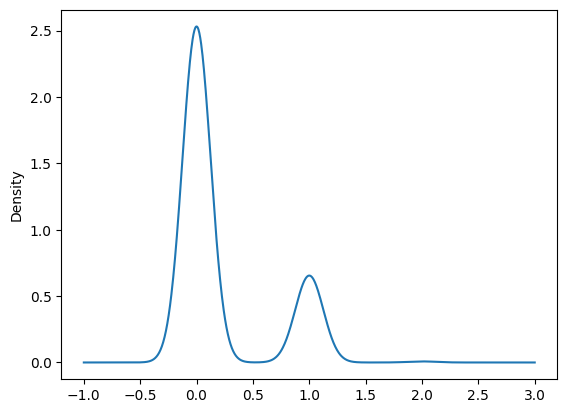

skewness value of pe is 1.6603513010689679


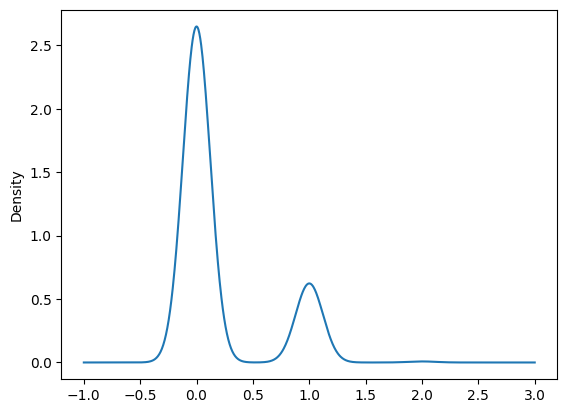

skewness value of ane is 2.0629242628629685


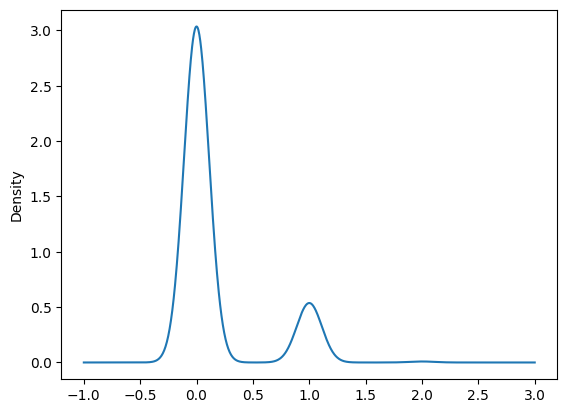

In [13]:
for col in df_cleaned.columns:
    if (df_cleaned[col].dtype == 'float' or 'int64'):
        print(f'skewness value of {col} is {df_cleaned[col].skew()}')
        df_cleaned[col].plot.kde()
        plt.show()

In [14]:
df_cleaned.shape

(400, 21)

In [15]:
y

,class
0,ckd
1,ckd
2,ckd
3,ckd
4,ckd
...,...
395,notckd
396,notckd
397,notckd
398,notckd


Let's check the label target distribution.

<ipython-input-16-a1f2165da438>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.values, y=label_counts.index, palette='Dark2')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


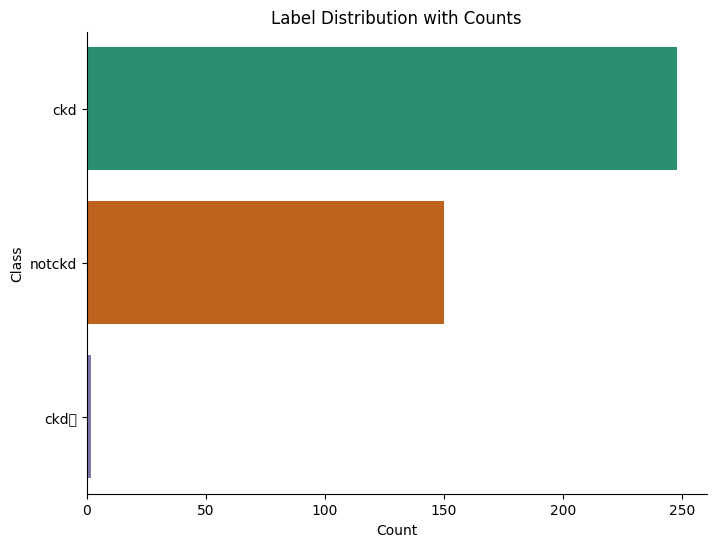

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
# Convert target variable y to a pandas Series
y_series = pd.Series(y['class'])  # Assuming the target variable is named 'class'

# Get label distribution with counts
label_counts = y_series.value_counts()

# Plot horizontal bar plot with counts
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.values, y=label_counts.index, palette='Dark2')
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Label Distribution with Counts')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


# There is one typo in the target column so we need to remove it or correct it.

In [17]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
y = chronic_kidney_disease.data.targets

# Check unique values in the 'class' column
unique_values = y['class'].unique()

print("Unique values in 'class' column:")
print(unique_values)

Unique values in 'class' column:
['ckd' 'ckd\t' 'notckd']


# It seems a valid target value distribution so there is no need for any kind of sampling.

<ipython-input-18-31e31129a253>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace({'ckd\t': 'ckd'})
<ipython-input-18-31e31129a253>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.values, y=class_distribution.index, palette='Dark2')


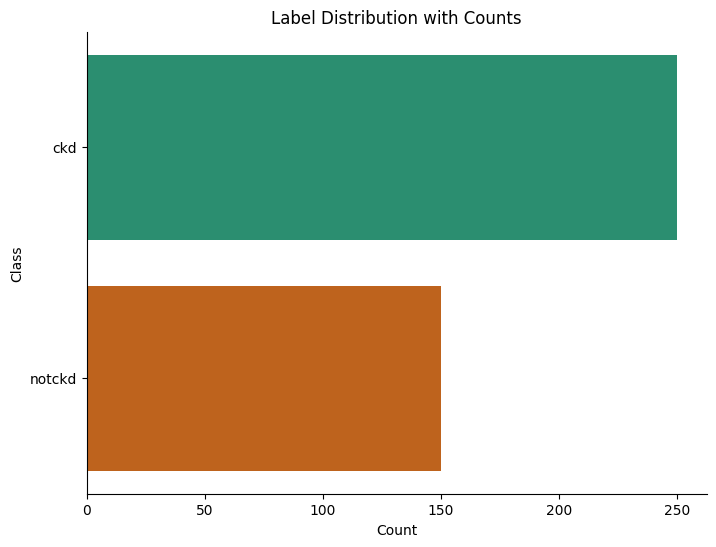

In [18]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt

# fetch dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

# data (as pandas dataframes)
y = chronic_kidney_disease.data.targets

# Replace 'ckd\t' with 'ckd' in the 'class' column
y['class'] = y['class'].replace({'ckd\t': 'ckd'})

# Calculate class distribution
class_distribution = y['class'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.values, y=class_distribution.index, palette='Dark2')
plt.xlabel('Count')
plt.ylabel('Class')
plt.title('Label Distribution with Counts')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [19]:
df_cleaned.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,sc,sod,pot,hemo,htn,dm,cad,appet,pe,ane
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,1.262500,0.972500,0.125000,0.075000,145.062500,...,2.997125,137.631250,4.577250,12.54250,0.377500,0.352500,0.095000,0.210000,0.195000,0.15500
std,16.982996,13.489785,0.005434,1.31313,1.040038,0.655491,0.593823,0.360138,0.299331,75.260774,...,5.628886,9.206332,2.821357,2.71649,0.495588,0.488713,0.310186,0.413918,0.402965,0.36921
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,0.400000,4.500000,2.500000,3.10000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,0.900000,135.000000,4.000000,10.87500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,1.300000,138.000000,4.400000,12.65000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,2.000000,1.000000,0.000000,0.000000,150.000000,...,2.725000,141.000000,4.800000,14.62500,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000
max,90.000000,180.000000,1.025000,5.00000,5.000000,2.000000,2.000000,2.000000,2.000000,490.000000,...,76.000000,163.000000,47.000000,17.80000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000


# **Model Building**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_cleaned, y, test_size = 0.25, random_state = 1234, shuffle=True)

Code for Confusion Matrix.

In [21]:
def plt_cm(cm, class_names):
    """
    Plot a confusion matrix with counts and percentages, including labels for TP, TN, FP, and FN.

    Parameters:
    cm (array-like): Confusion matrix.
    class_names (list): List of class names.
    """
    # Define labels for the confusion matrix
    labels = np.array([
        ["True Neg (TN)", "False Pos (FP)"],
        ["False Neg (FN)", "True Pos (TP)"]
    ])

    # Calculate counts and percentages
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]

    # Combine counts and percentages with the labels
    combined_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(labels.flatten(), group_counts, group_percentages)]
    combined_labels = np.asarray(combined_labels).reshape(cm.shape[0], cm.shape[1])

    # Create heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=combined_labels, fmt='', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()



# **For the Classification we are going to use below listed algorithms along with cross fold validation and hypertuning each of these algorithms.**


1.   Logistic Regression.
2.   KNN.
1.   Decision Tree.
2.   Randon Forest.
1.   Naive Byes.
2.   Adaboost.
1.   Support Vector Machine.




# 1) Logistic Regression.
















/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.96


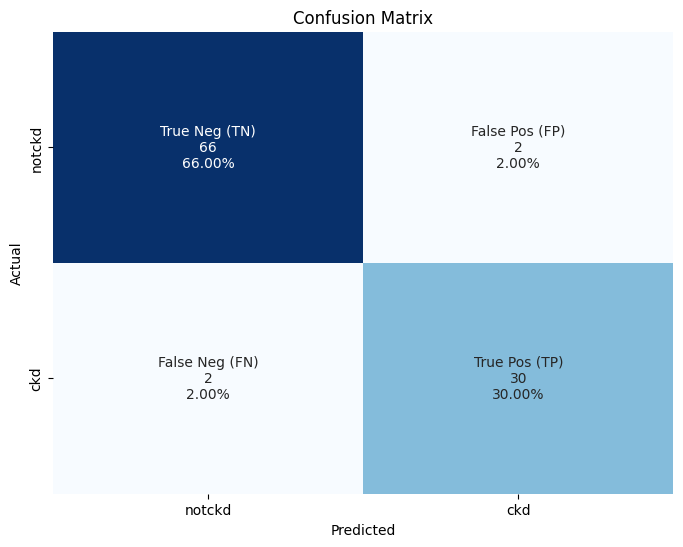

Classification Report:
              precision    recall  f1-score   support

         ckd       0.97      0.97      0.97        68
      notckd       0.94      0.94      0.94        32

    accuracy                           0.96       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.96      0.96      0.96       100



In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
class_names = ['notckd', 'ckd']  # Replace with your actual class names
plt_cm(cm, class_names)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression is sensitive to the outliers so it is good to use standardization here.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.99


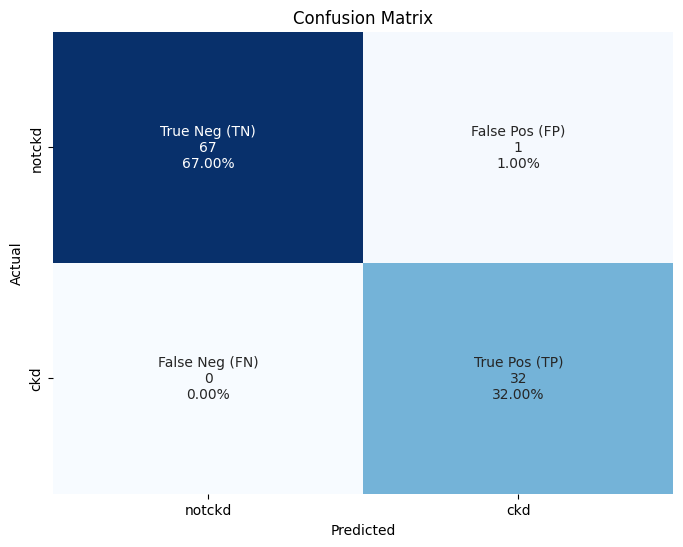

Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

****************************************************************************************************
Sensitivity (Recall): 1.00
Specificity: 0.99
****************************************************************************************************


In [24]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
cm = confusion_matrix(y_test, y_pred)
plt_cm(cm, class_names)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("*"*100)

# Compute sensitivity and specificity
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)  # Recall or True Positive Rate
specificity = TN / (TN + FP)  # True Negative Rate

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print("*"*100)

# Let's go for the Cross Fold Validation for ensuring the accuracy with high support value.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Confusion Matrix:


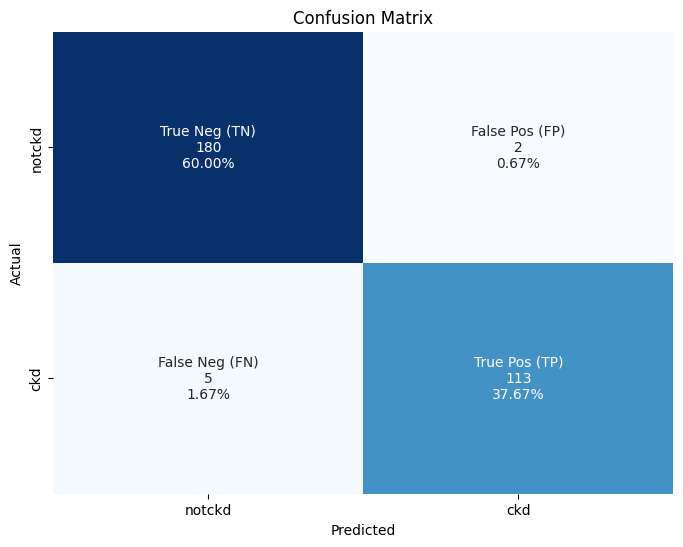

Classification Report:
              precision    recall  f1-score   support

         ckd       0.97      0.99      0.98       182
      notckd       0.98      0.96      0.97       118

    accuracy                           0.98       300
   macro avg       0.98      0.97      0.98       300
weighted avg       0.98      0.98      0.98       300

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Cross-validation scores: [0.98333333 0.96666667 0.98333333 1.         0.95      ]
Mean cross-validation score: 0.9766666666666666
Standard deviation of cross-validation scores: 0.016996731711975955
****************************************************************************************************
Sensitivity (Recall): 0.96
Specificity: 0.99
****************************************************************************************************


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
y_pred = cross_val_predict(logreg, X_train_scaled, y_train, cv=5, method='predict')
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
plt_cm(cm, ['notckd', 'ckd'])

print("Classification Report:")
print(classification_report(y_train, y_pred))
print("*"*100)
# Compute cross-validation scores
cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))
print("Standard deviation of cross-validation scores:", np.std(cv_scores))
print("*"*100)

# Compute sensitivity and specificity
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)  # Recall or True Positive Rate
specificity = TN / (TN + FP)  # True Negative Rate

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print("*"*100)

## **Hypertuning.**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

****************************************************************************************************
Best parameters: {'C': 1, 'solver': 'liblinear'}
Best cross-validation score: 0.9833333333333332
****************************************************************************************************
Accuracy: 0.99
Confusion Matrix:


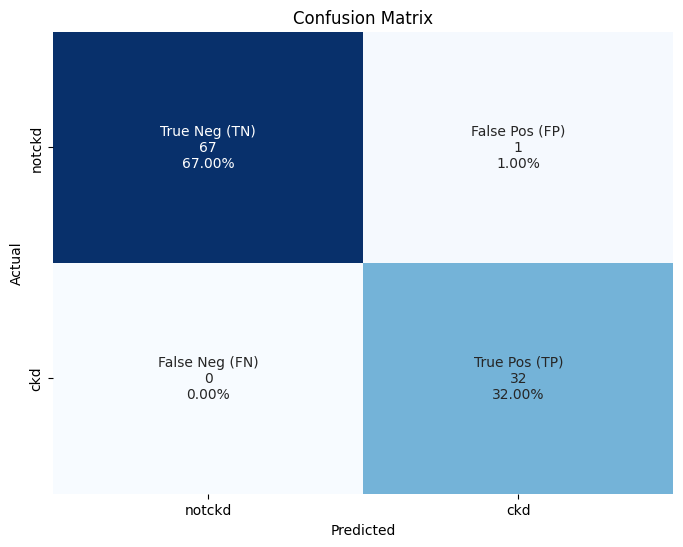

****************************************************************************************************
Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Sensitivity (Recall): 1.00
Specificity: 0.99
****************************************************************************************************


In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'newton-cg', 'lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)
print("*"*100)
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
print("*"*100)
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)

# Compute accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_test_pred)
cm = confusion_matrix(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
plt_cm(cm, ['notckd', 'ckd'])
print("*"*100)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute sensitivity and specificity
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

sensitivity = TP / (TP + FN)  # Recall or True Positive Rate
specificity = TN / (TN + FP)  # True Negative Rate

print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print("*"*100)

# 2) KNN Classifier.

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 0.76


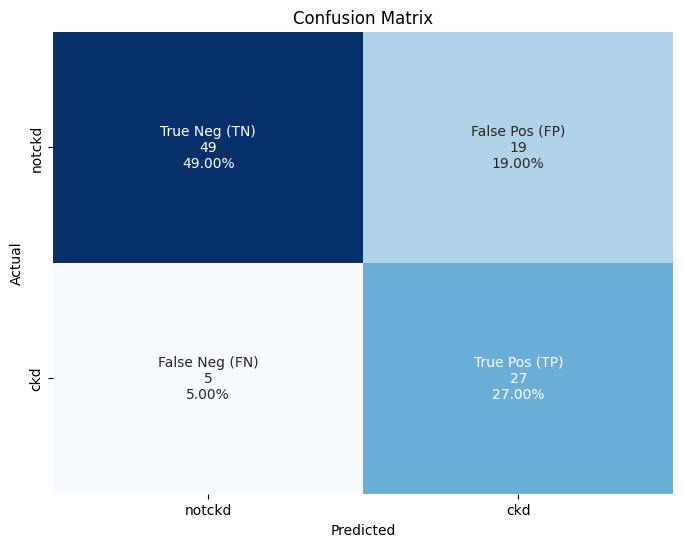

KNN Classification Report:
              precision    recall  f1-score   support

         ckd       0.91      0.72      0.80        68
      notckd       0.59      0.84      0.69        32

    accuracy                           0.76       100
   macro avg       0.75      0.78      0.75       100
weighted avg       0.80      0.76      0.77       100



In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')

# Generate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)


# Plot the confusion matrix for KNN
class_names = ['notckd', 'ckd']
plt_cm(cm_knn, class_names)

# Print classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


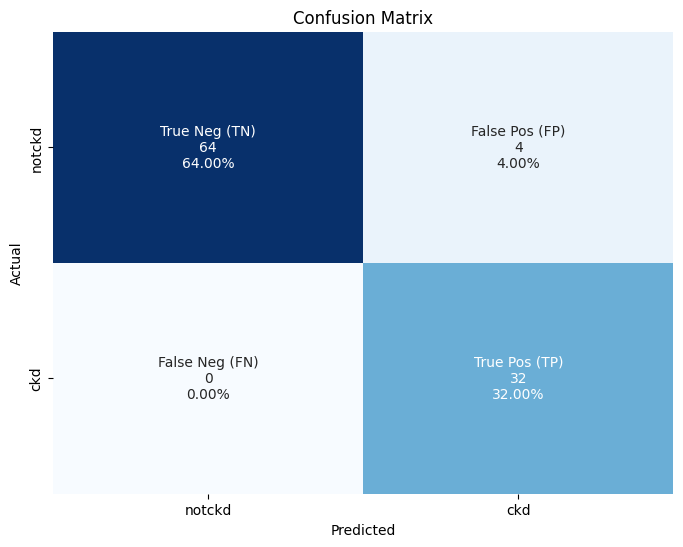

KNN Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.94      0.97        68
      notckd       0.89      1.00      0.94        32

    accuracy                           0.96       100
   macro avg       0.94      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [28]:

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

# Predict the target values for the test set
y_pred_knn = knn.predict(X_test_scaled)
cm_knn = confusion_matrix(y_test, y_pred_knn)


# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
plt_cm(cm_knn, class_names)

# Print classification report for KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))


# K fold validation.

KNN Confusion Matrix (Cross-Validation):


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

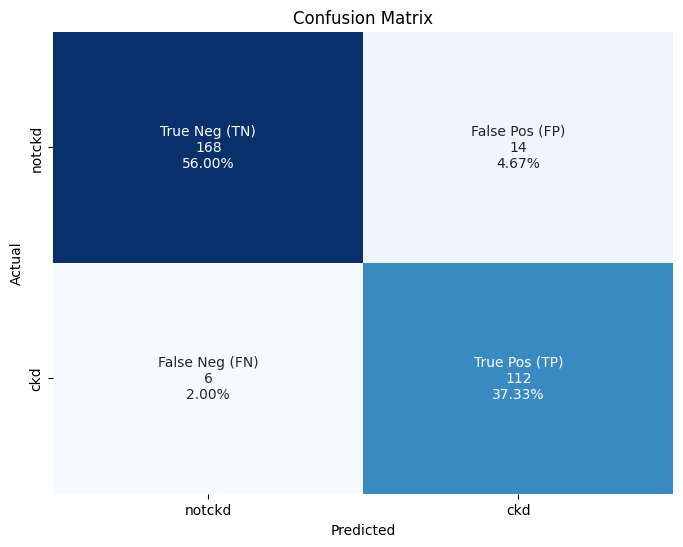

KNN Classification Report (Cross-Validation):
              precision    recall  f1-score   support

         ckd       0.97      0.92      0.94       182
      notckd       0.89      0.95      0.92       118

    accuracy                           0.93       300
   macro avg       0.93      0.94      0.93       300
weighted avg       0.94      0.93      0.93       300

****************************************************************************************************
KNN Cross-validation scores: [0.96666667 0.86666667 0.95       0.98333333 0.9       ]
Mean cross-validation score: 0.9333333333333333
Standard deviation of cross-validation scores: 0.043461349368017634
****************************************************************************************************
KNN Sensitivity (Recall): 0.95
KNN Specificity: 0.92
****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
import numpy as np

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform cross-validation predictions
y_pred_knn_cv = cross_val_predict(knn, X_train_scaled, y_train, cv=5)

# Confusion matrix for cross-validation predictions
cm_knn_cv = confusion_matrix(y_train, y_pred_knn_cv)
print("KNN Confusion Matrix (Cross-Validation):")
plt_cm(cm_knn_cv, class_names)

# Classification report for cross-validation predictions
print("KNN Classification Report (Cross-Validation):")
print(classification_report(y_train, y_pred_knn_cv))
print("*"*100)

# Compute cross-validation scores
cv_scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("KNN Cross-validation scores:", cv_scores_knn)
print("Mean cross-validation score:", np.mean(cv_scores_knn))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_knn))
print("*"*100)

# Compute sensitivity and specificity for cross-validation predictions
TP_knn = cm_knn_cv[1, 1]  # True Positives
TN_knn = cm_knn_cv[0, 0]  # True Negatives
FP_knn = cm_knn_cv[0, 1]  # False Positives
FN_knn = cm_knn_cv[1, 0]  # False Negatives

sensitivity_knn = TP_knn / (TP_knn + FN_knn)  # Recall or True Positive Rate
specificity_knn = TN_knn / (TN_knn + FP_knn)  # True Negative Rate

print(f"KNN Sensitivity (Recall): {sensitivity_knn:.2f}")
print(f"KNN Specificity: {specificity_knn:.2f}")
print("*"*100)


# Hyperparameter Tuning

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

****************************************************************************************************
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Score: 0.9733333333333333
****************************************************************************************************


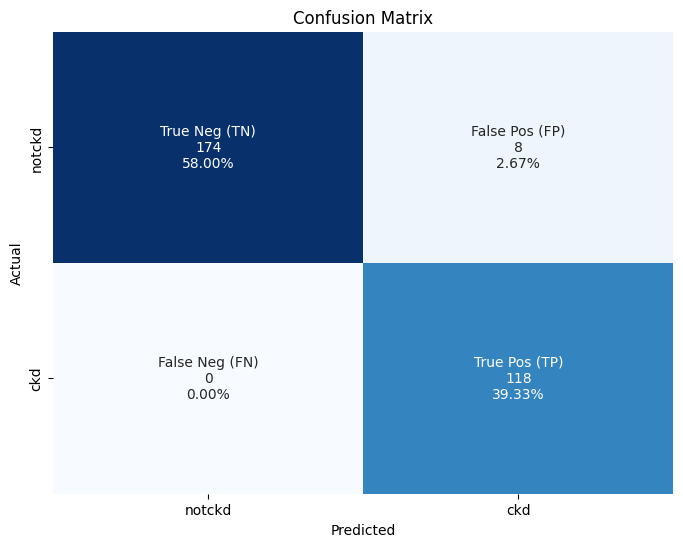

Best KNN Classification Report:
              precision    recall  f1-score   support

         ckd       1.00      0.96      0.98       182
      notckd       0.94      1.00      0.97       118

    accuracy                           0.97       300
   macro avg       0.97      0.98      0.97       300
weighted avg       0.98      0.97      0.97       300

****************************************************************************************************
Best KNN Cross-validation scores: [0.98333333 0.95       0.96666667 0.98333333 0.98333333]
Mean cross-validation score: 0.9733333333333333
Standard deviation of cross-validation scores: 0.013333333333333324
****************************************************************************************************
Cross-Validated Sensitivity (Recall): 1.00
Cross-Validated Specificity: 0.96
****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train_scaled, y_train)
print("*"*100)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)
print("*"*100)

# Use the best estimator to make predictions on the test set
best_knn = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_knn, X_train_scaled, y_train, cv=5)

# Evaluate the model
cm_cv = confusion_matrix(y_train, y_pred_cv)
plt_cm(cm_cv, class_names)

print("Best KNN Classification Report:")
print(classification_report(y_train, y_pred_cv))
print("*"*100)

# Calculate sensitivity and specificity
TP_cv = cm_cv[1, 1]  # True Positives
TN_cv = cm_cv[0, 0]  # True Negatives
FP_cv = cm_cv[0, 1]  # False Positives
FN_cv = cm_cv[1, 0]  # False Negatives

sensitivity_cv = TP_cv / (TP_cv + FN_cv)
specificity_cv = TN_cv / (TN_cv + FP_cv)
# Print cross-validation scores for the best model
cv_scores_best_knn = cross_val_score(best_knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Best KNN Cross-validation scores:", cv_scores_best_knn)
print("Mean cross-validation score:", np.mean(cv_scores_best_knn))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_knn))
print("*"*100)
print(f"Cross-Validated Sensitivity (Recall): {sensitivity_cv:.2f}")
print(f"Cross-Validated Specificity: {specificity_cv:.2f}")
print("*"*100)

# 3) Decision Tree.

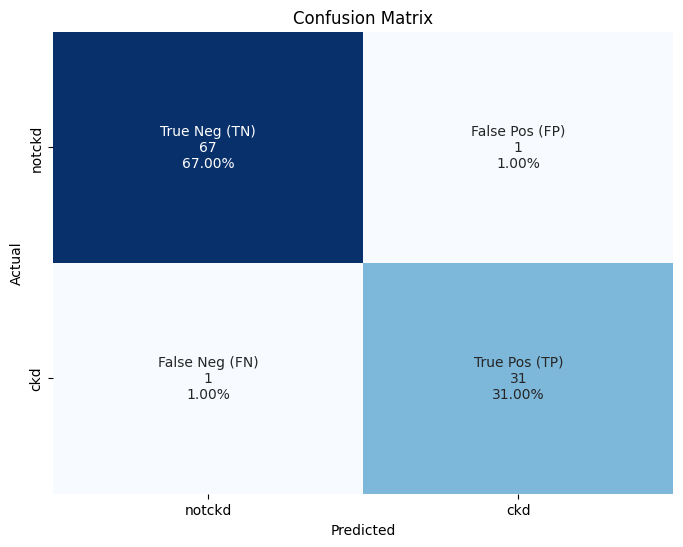

Test Accuracy for Decision Tree: 0.98
Decision Tree Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       0.99      0.99      0.99        68
      notckd       0.97      0.97      0.97        32

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100

Training Accuracy for Decision Tree: 1.00
Cross-Validated Confusion Matrix for Decision Tree:


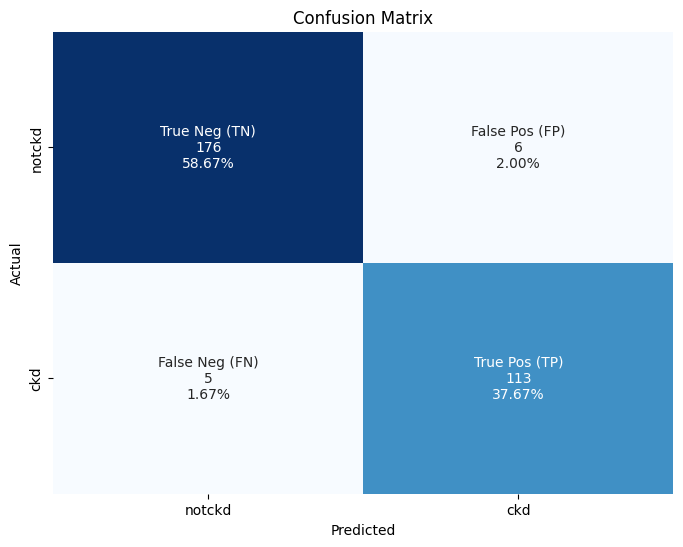

Cross-Validated Classification Report for Decision Tree:
              precision    recall  f1-score   support

         ckd       0.97      0.97      0.97       182
      notckd       0.95      0.96      0.95       118

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

Cross-Validated Sensitivity (Recall) for Decision Tree: 0.96
Cross-Validated Specificity for Decision Tree: 0.97


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model with default parameters
dtree = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtree.fit(X_train, y_train)

# Predict the target values for the test set
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model on the test set
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
plt_cm(cm_dtree, class_names)

# Calculate and print test accuracy
test_accuracy = dtree.score(X_test, y_test)
print(f"Test Accuracy for Decision Tree: {test_accuracy:.2f}")

print("Decision Tree Classification Report (Test Set):")
print(classification_report(y_test, y_pred_dtree))

# Perform cross-validation prediction for combined support
y_pred_cv_dtree = cross_val_predict(dtree, X_train, y_train, cv=5)

# Evaluate the model on the combined cross-validated predictions
cm_cv_dtree = confusion_matrix(y_train, y_pred_cv_dtree)

# Calculate and print training accuracy
train_accuracy = dtree.score(X_train, y_train)
print(f"Training Accuracy for Decision Tree: {train_accuracy:.2f}")

print("Cross-Validated Confusion Matrix for Decision Tree:")
plt_cm(cm_cv_dtree, class_names)

print("Cross-Validated Classification Report for Decision Tree:")
print(classification_report(y_train, y_pred_cv_dtree))

# Calculate sensitivity and specificity for cross-validation results
TP_cv_dtree = cm_cv_dtree[1, 1]  # True Positives
TN_cv_dtree = cm_cv_dtree[0, 0]  # True Negatives
FP_cv_dtree = cm_cv_dtree[0, 1]  # False Positives
FN_cv_dtree = cm_cv_dtree[1, 0]  # False Negatives

sensitivity_cv_dtree = TP_cv_dtree / (TP_cv_dtree + FN_cv_dtree)
specificity_cv_dtree = TN_cv_dtree / (TN_cv_dtree + FP_cv_dtree)

print(f"Cross-Validated Sensitivity (Recall) for Decision Tree: {sensitivity_cv_dtree:.2f}")
print(f"Cross-Validated Specificity for Decision Tree: {specificity_cv_dtree:.2f}")


Decision tree is not distance based algorithm so there is no need for standardization so we will for hypertuning.

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score: 0.9866666666666667
Training Accuracy for Best Decision Tree: 1.00
Test Accuracy for Best Decision Tree: 0.99


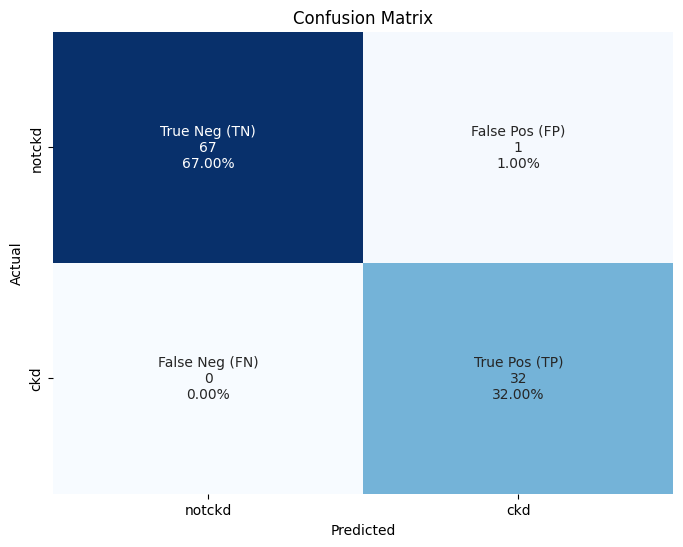

Best Decision Tree Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



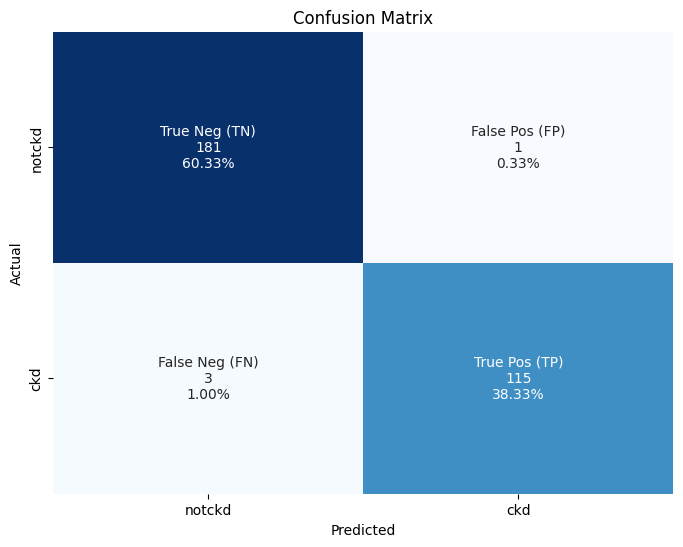

Cross-Validated Confusion Matrix for Best Decision Tree:
[[181   1]
 [  3 115]]
Cross-Validated Classification Report for Best Decision Tree:
              precision    recall  f1-score   support

         ckd       0.98      0.99      0.99       182
      notckd       0.99      0.97      0.98       118

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300

Best Decision Tree Cross-validation scores: [0.98333333 0.96666667 0.98333333 1.         1.        ]
Mean cross-validation score: 0.9866666666666667
Standard deviation of cross-validation scores: 0.012472191289246475


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Initialize the Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'splitter': ['best', 'random'],  # Strategy used to split at each node
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 10, 1),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 10, 1),  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_dtree.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search_dtree.best_params_)
print("Best Cross-Validation Score:", grid_search_dtree.best_score_)

# Use the best estimator to make predictions on the test set
best_dtree = grid_search_dtree.best_estimator_

# Calculate training accuracy
train_accuracy = best_dtree.score(X_train, y_train)
print(f"Training Accuracy for Best Decision Tree: {train_accuracy:.2f}")

# Predict on the test set
y_pred_best_dtree = best_dtree.predict(X_test)

# Calculate test accuracy
test_accuracy = best_dtree.score(X_test, y_test)
print(f"Test Accuracy for Best Decision Tree: {test_accuracy:.2f}")

# Evaluate the model on the test set
cm_best_dtree = confusion_matrix(y_test, y_pred_best_dtree)
plt_cm(cm_best_dtree, class_names)

print("Best Decision Tree Classification Report (Test Set):")
print(classification_report(y_test, y_pred_best_dtree))

# Perform cross-validation prediction to get combined support
y_pred_cv_best_dtree = cross_val_predict(best_dtree, X_train, y_train, cv=5)

# Evaluate the model on the combined cross-validated predictions
cm_cv_best_dtree = confusion_matrix(y_train, y_pred_cv_best_dtree)
plt_cm(cm_cv_best_dtree, class_names)

print("Cross-Validated Confusion Matrix for Best Decision Tree:")
print(cm_cv_best_dtree)

print("Cross-Validated Classification Report for Best Decision Tree:")
print(classification_report(y_train, y_pred_cv_best_dtree))

# Print cross-validation scores for the best model
cv_scores_best_dtree = cross_val_score(best_dtree, X_train, y_train, cv=5, scoring='accuracy')
print("Best Decision Tree Cross-validation scores:", cv_scores_best_dtree)
print("Mean cross-validation score:", np.mean(cv_scores_best_dtree))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_dtree))


# 4) Random Forest.
with cross validation

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy for Random Forest: 1.00
Test Accuracy for Random Forest: 0.99


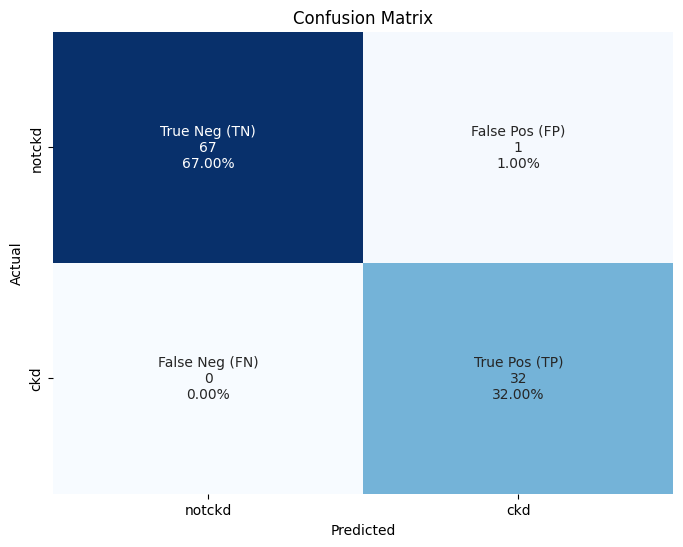

Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

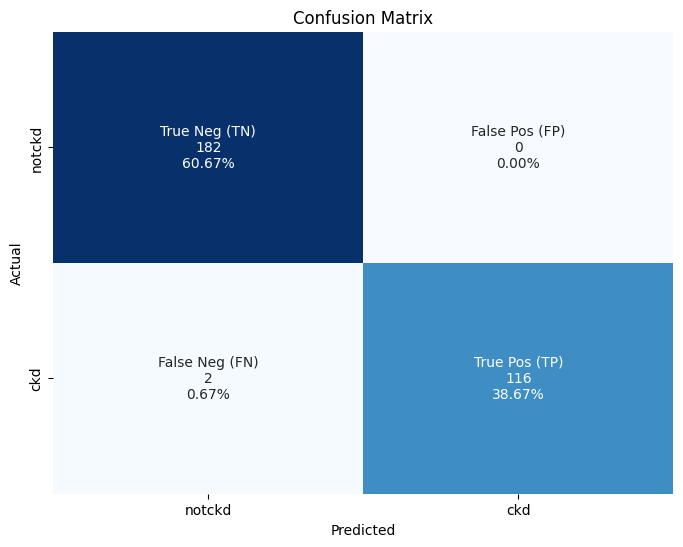

Cross-Validated Confusion Matrix for Random Forest:
[[182   0]
 [  2 116]]
Cross-Validated Classification Report for Random Forest:
              precision    recall  f1-score   support

         ckd       0.99      1.00      0.99       182
      notckd       1.00      0.98      0.99       118

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Random Forest Cross-validation scores: [1.         0.96666667 1.         1.         1.        ]
Mean cross-validation score: 0.9933333333333334
Standard deviation of cross-validation scores: 0.01333333333333333


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with default parameters
rf = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = rf.score(X_train, y_train)
print(f"Training Accuracy for Random Forest: {train_accuracy:.2f}")

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate test accuracy
test_accuracy = rf.score(X_test, y_test)
print(f"Test Accuracy for Random Forest: {test_accuracy:.2f}")

# Evaluate the model on the test set
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt_cm(cm_rf, class_names)

print("Random Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_rf))

# Perform cross-validation and get predictions for the training set
y_pred_cv_rf = cross_val_predict(rf, X_train, y_train, cv=5)

# Evaluate the model on the combined cross-validated predictions
cm_cv_rf = confusion_matrix(y_train, y_pred_cv_rf)
plt_cm(cm_cv_rf, class_names)

print("Cross-Validated Confusion Matrix for Random Forest:")
print(cm_cv_rf)

print("Cross-Validated Classification Report for Random Forest:")
print(classification_report(y_train, y_pred_cv_rf))

# Print cross-validation scores
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-validation scores:", cv_scores_rf)
print("Mean cross-validation score:", np.mean(cv_scores_rf))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_rf))


Hyperparameter Tuning.

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy'}
Best Score (on training data): 0.9933333333333333
****************************************************************************************************
Training Accuracy for Best Random Forest: 1.00
Test Accuracy for Best Random Forest: 0.99
****************************************************************************************************


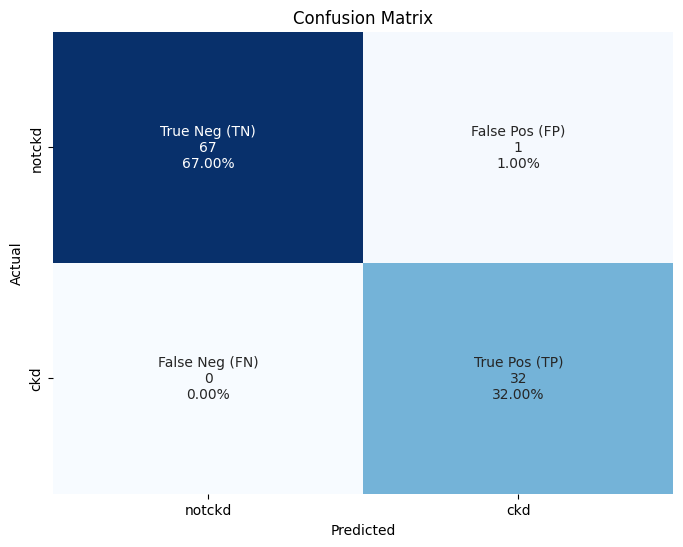

Best Random Forest Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

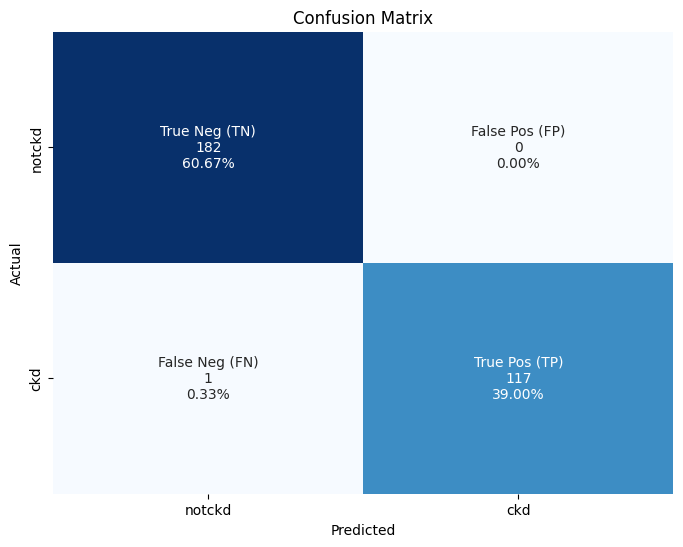

Cross-Validated Confusion Matrix for Best Random Forest:
[[182   0]
 [  1 117]]
Cross-Validated Classification Report for Best Random Forest:
              precision    recall  f1-score   support

         ckd       0.99      1.00      1.00       182
      notckd       1.00      0.99      1.00       118

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

****************************************************************************************************
Cross-Validated Sensitivity (Recall) for Best Random Forest: 0.99
Cross-Validated Specificity for Best Random Forest: 1.00
****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Random Forest Cross-validation scores: [1.         1.         0.98333333 1.         1.        ]
Mean cross-validation score: 0.9966666666666667
Standard deviation of cross-validation scores: 0.006666666666666687


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict, cross_val_score

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid to search
param_distributions = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': np.arange(2, 10, 2),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 5, 1),  # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Initialize RandomizedSearchCV with a limited number of iterations
random_search_rf = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=10, cv=3, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Fit the model using RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search_rf.best_params_)
print("Best Score (on training data):", random_search_rf.best_score_)
print("*"*100)

# Use the best estimator to make predictions on the test set
best_rf = random_search_rf.best_estimator_

# Calculate training accuracy
train_accuracy = best_rf.score(X_train, y_train)
print(f"Training Accuracy for Best Random Forest: {train_accuracy:.2f}")

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test)

# Calculate test accuracy
test_accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy for Best Random Forest: {test_accuracy:.2f}")
print("*"*100)
# Evaluate the model on the test set
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt_cm(cm_best_rf, class_names)

print("Best Random Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_best_rf))
print("*"*100)
# Perform cross-validation prediction to get combined support
y_pred_cv_best_rf = cross_val_predict(best_rf, X_train, y_train, cv=5)

# Evaluate the model on the combined cross-validated predictions
cm_cv_best_rf = confusion_matrix(y_train, y_pred_cv_best_rf)
plt_cm(cm_cv_best_rf, class_names)

print("Cross-Validated Confusion Matrix for Best Random Forest:")
print(cm_cv_best_rf)

print("Cross-Validated Classification Report for Best Random Forest:")
print(classification_report(y_train, y_pred_cv_best_rf))
print("*"*100)
# Calculate sensitivity and specificity for cross-validation results
TP_cv_rf = cm_cv_best_rf[1, 1]  # True Positives
TN_cv_rf = cm_cv_best_rf[0, 0]  # True Negatives
FP_cv_rf = cm_cv_best_rf[0, 1]  # False Positives
FN_cv_rf = cm_cv_best_rf[1, 0]  # False Negatives

sensitivity_cv_rf = TP_cv_rf / (TP_cv_rf + FN_cv_rf)
specificity_cv_rf = TN_cv_rf / (TN_cv_rf + FP_cv_rf)

print(f"Cross-Validated Sensitivity (Recall) for Best Random Forest: {sensitivity_cv_rf:.2f}")
print(f"Cross-Validated Specificity for Best Random Forest: {specificity_cv_rf:.2f}")
print("*"*100)
# Print cross-validation scores for the best model
cv_scores_best_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Best Random Forest Cross-validation scores:", cv_scores_best_rf)
print("Mean cross-validation score:", np.mean(cv_scores_best_rf))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_rf))


# ***5) Naive Byes ***

Training Accuracy for Naive Bayes: 0.95
Test Accuracy for Naive Bayes: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


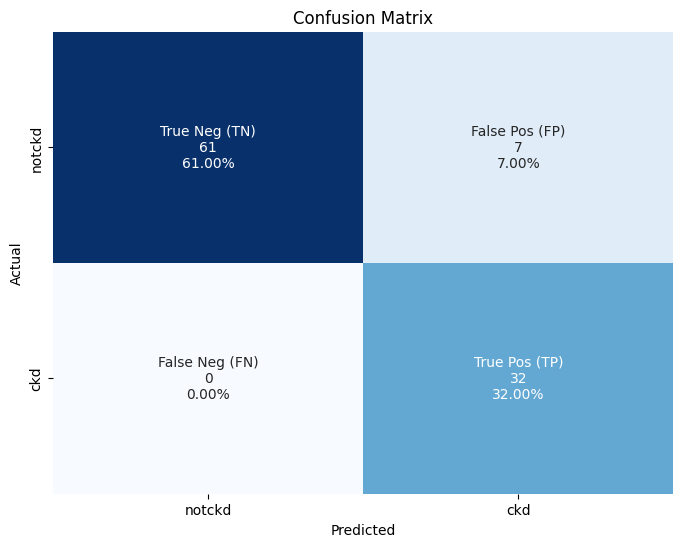

Naive Bayes Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.90      0.95        68
      notckd       0.82      1.00      0.90        32

    accuracy                           0.93       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.94      0.93      0.93       100



In [35]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Predict the target values for the training set
y_pred_train_nb = nb.predict(X_train)

# Predict the target values for the test set
y_pred_test_nb = nb.predict(X_test)

# Calculate training accuracy
train_accuracy_nb = accuracy_score(y_train, y_pred_train_nb)
print(f"Training Accuracy for Naive Bayes: {train_accuracy_nb:.2f}")

# Calculate test accuracy
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)
print(f"Test Accuracy for Naive Bayes: {test_accuracy_nb:.2f}")

# Evaluate the model on the test set
cm_test_nb = confusion_matrix(y_test, y_pred_test_nb)


# Plot confusion matrix
plt_cm(cm_test_nb, class_names)

# Print classification report for test set
print("Naive Bayes Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_nb))


# Cross Validation along with hypertuning.

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'var_smoothing': 2.310129700083158e-06}
Best Cross-Validation Score: 0.9466666666666667
Training Accuracy for Best Naive Bayes: 0.95
Test Accuracy for Best Naive Bayes: 0.93


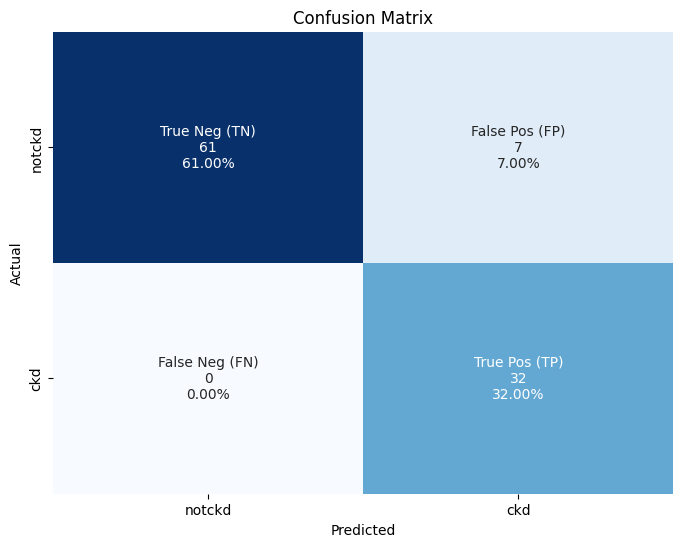

Naive Bayes Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.90      0.95        68
      notckd       0.82      1.00      0.90        32

    accuracy                           0.93       100
   macro avg       0.91      0.95      0.92       100
weighted avg       0.94      0.93      0.93       100



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

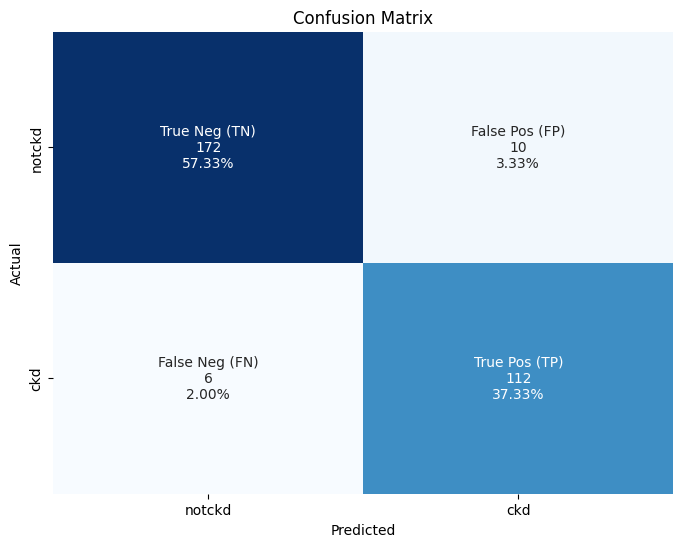

Cross-Validated Confusion Matrix for Best Naive Bayes:
[[172  10]
 [  6 112]]
Cross-Validated Classification Report for Best Naive Bayes:
              precision    recall  f1-score   support

         ckd       0.97      0.95      0.96       182
      notckd       0.92      0.95      0.93       118

    accuracy                           0.95       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.95      0.95       300

Cross-Validated Sensitivity (Recall) for Best Naive Bayes: 0.95
Cross-Validated Specificity for Best Naive Bayes: 0.95
Best Naive Bayes Cross-validation scores: [0.96666667 0.93333333 0.96666667 0.96666667 0.9       ]
Mean cross-validation score: 0.9466666666666667
Standard deviation of cross-validation scores: 0.02666666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [36]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb = GaussianNB()

# Define hyperparameters to search (though GaussianNB has no hyperparameters to tune)
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)  # This parameter controls the smoothing applied to the variance
}

# Initialize GridSearchCV with cross-validation
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_nb.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search_nb.best_params_)
print("Best Cross-Validation Score:", grid_search_nb.best_score_)

# Use the best estimator to make predictions on the test set
best_nb = grid_search_nb.best_estimator_

# Calculate training accuracy
train_accuracy_nb = best_nb.score(X_train, y_train)
print(f"Training Accuracy for Best Naive Bayes: {train_accuracy_nb:.2f}")

# Predict on the test set
y_pred_test_nb = best_nb.predict(X_test)

# Calculate test accuracy
test_accuracy_nb = accuracy_score(y_test, y_pred_test_nb)
print(f"Test Accuracy for Best Naive Bayes: {test_accuracy_nb:.2f}")

# Evaluate the model on the test set
cm_test_nb = confusion_matrix(y_test, y_pred_test_nb)

# Plot confusion matrix
plt_cm(cm_test_nb, class_names)

# Print classification report for test set
print("Naive Bayes Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_nb))

# Perform cross-validation prediction to get combined support
y_pred_cv_nb = cross_val_predict(best_nb, X_train, y_train, cv=5)

# Evaluate the model on the combined cross-validated predictions
cm_cv_nb = confusion_matrix(y_train, y_pred_cv_nb)
plt_cm(cm_cv_nb, class_names)

print("Cross-Validated Confusion Matrix for Best Naive Bayes:")
print(cm_cv_nb)

print("Cross-Validated Classification Report for Best Naive Bayes:")
print(classification_report(y_train, y_pred_cv_nb))

# Calculate sensitivity and specificity for cross-validation results
TP_cv_nb = cm_cv_nb[1, 1]  # True Positives
TN_cv_nb = cm_cv_nb[0, 0]  # True Negatives
FP_cv_nb = cm_cv_nb[0, 1]  # False Positives
FN_cv_nb = cm_cv_nb[1, 0]  # False Negatives

sensitivity_cv_nb = TP_cv_nb / (TP_cv_nb + FN_cv_nb)
specificity_cv_nb = TN_cv_nb / (TN_cv_nb + FP_cv_nb)

print(f"Cross-Validated Sensitivity (Recall) for Best Naive Bayes: {sensitivity_cv_nb:.2f}")
print(f"Cross-Validated Specificity for Best Naive Bayes: {specificity_cv_nb:.2f}")

# Print cross-validation scores for the best model
cv_scores_best_nb = cross_val_score(best_nb, X_train, y_train, cv=5, scoring='accuracy')
print("Best Naive Bayes Cross-validation scores:", cv_scores_best_nb)
print("Mean cross-validation score:", np.mean(cv_scores_best_nb))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_nb))


# **6) Adaboost.**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy for AdaBoost: 1.00
Test Accuracy for AdaBoost: 0.99


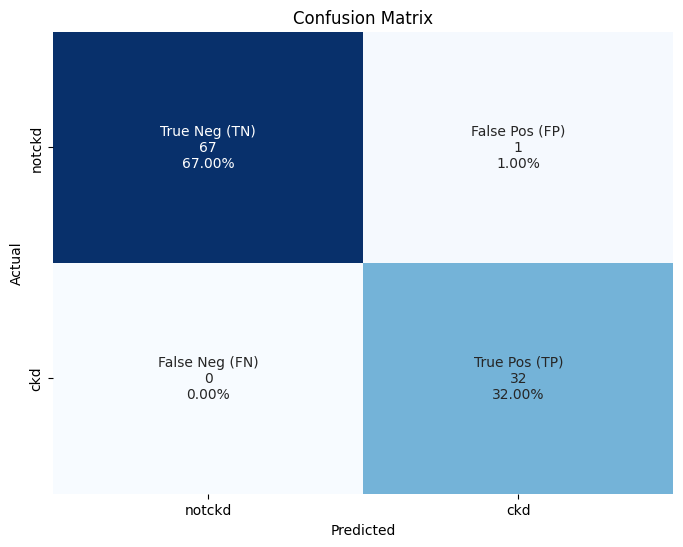

AdaBoost Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [37]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoost model with default parameters
ada = AdaBoostClassifier(random_state=42)

# Fit the model to the training data
ada.fit(X_train, y_train)

# Predict the target values for the training set
y_pred_train_ada = ada.predict(X_train)

# Predict the target values for the test set
y_pred_test_ada = ada.predict(X_test)

# Calculate training accuracy
train_accuracy_ada = accuracy_score(y_train, y_pred_train_ada)
print(f"Training Accuracy for AdaBoost: {train_accuracy_ada:.2f}")

# Calculate test accuracy
test_accuracy_ada = accuracy_score(y_test, y_pred_test_ada)
print(f"Test Accuracy for AdaBoost: {test_accuracy_ada:.2f}")

# Evaluate the model on the test set
cm_test_ada = confusion_matrix(y_test, y_pred_test_ada)

# Plot confusion matrix
plt_cm(cm_test_ada, class_names)

# Print classification report for test set
print("AdaBoost Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_ada))


# K Fold  Validation

Training Accuracy for AdaBoost: 1.00
Test Accuracy for AdaBoost: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


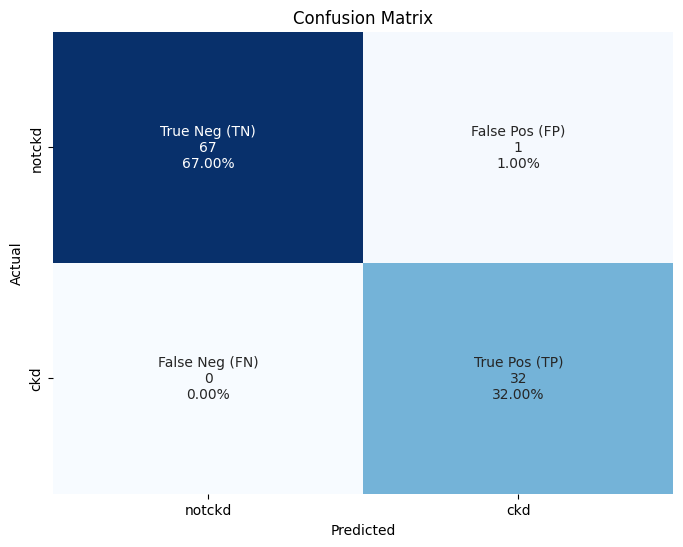

AdaBoost Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

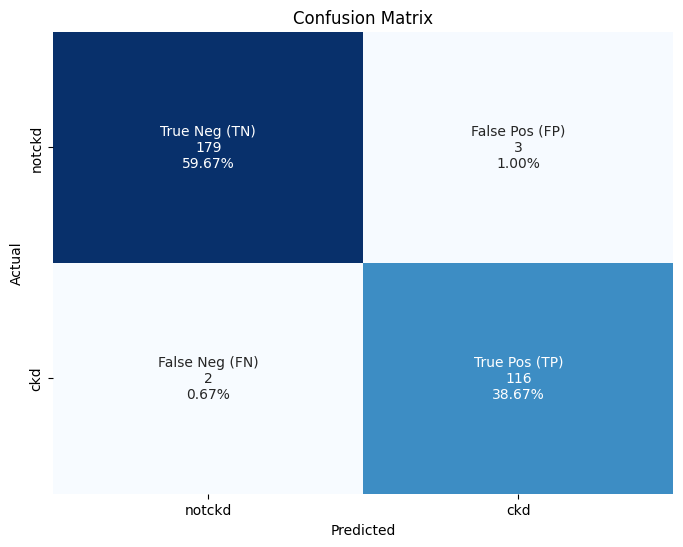

Cross-Validated Confusion Matrix for AdaBoost:
[[179   3]
 [  2 116]]
Cross-Validated Classification Report for AdaBoost:
              precision    recall  f1-score   support

         ckd       0.99      0.98      0.99       182
      notckd       0.97      0.98      0.98       118

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Cross-Validated Sensitivity (Recall) for AdaBoost: 0.98
Cross-Validated Specificity for AdaBoost: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

AdaBoost Cross-validation scores: [0.96666667 0.96666667 0.98333333 1.         1.        ]
Mean cross-validation score: 0.9833333333333332
Standard deviation of cross-validation scores: 0.014907119849998594


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Initialize the AdaBoost model with default parameters
ada = AdaBoostClassifier(random_state=42)

# Fit the model to the training data
ada.fit(X_train, y_train)

# Predict the target values for the training set
y_pred_train_ada = ada.predict(X_train)

# Predict the target values for the test set
y_pred_test_ada = ada.predict(X_test)

# Calculate training accuracy
train_accuracy_ada = accuracy_score(y_train, y_pred_train_ada)
print(f"Training Accuracy for AdaBoost: {train_accuracy_ada:.2f}")

# Calculate test accuracy
test_accuracy_ada = accuracy_score(y_test, y_pred_test_ada)
print(f"Test Accuracy for AdaBoost: {test_accuracy_ada:.2f}")

# Evaluate the model on the test set
cm_test_ada = confusion_matrix(y_test, y_pred_test_ada)

# Plot confusion matrix
plt_cm(cm_test_ada, class_names)

# Print classification report for test set
print("AdaBoost Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_ada))

# Perform cross-validation prediction to get combined support
y_pred_cv_ada = cross_val_predict(ada, X_train, y_train, cv=5)

# Evaluate the model on the cross-validated predictions
cm_cv_ada = confusion_matrix(y_train, y_pred_cv_ada)
plt_cm(cm_cv_ada, class_names)

print("Cross-Validated Confusion Matrix for AdaBoost:")
print(cm_cv_ada)

print("Cross-Validated Classification Report for AdaBoost:")
print(classification_report(y_train, y_pred_cv_ada))

# Calculate sensitivity and specificity for cross-validation results
TP_cv_ada = cm_cv_ada[1, 1]  # True Positives
TN_cv_ada = cm_cv_ada[0, 0]  # True Negatives
FP_cv_ada = cm_cv_ada[0, 1]  # False Positives
FN_cv_ada = cm_cv_ada[1, 0]  # False Negatives

sensitivity_cv_ada = TP_cv_ada / (TP_cv_ada + FN_cv_ada)
specificity_cv_ada = TN_cv_ada / (TN_cv_ada + FP_cv_ada)

print(f"Cross-Validated Sensitivity (Recall) for AdaBoost: {sensitivity_cv_ada:.2f}")
print(f"Cross-Validated Specificity for AdaBoost: {specificity_cv_ada:.2f}")

# Print cross-validation scores
cv_scores_best_ada = cross_val_score(ada, X_train, y_train, cv=5, scoring='accuracy')
print("AdaBoost Cross-validation scores:", cv_scores_best_ada)
print("Mean cross-validation score:", np.mean(cv_scores_best_ada))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_ada))


# **7) Support Vector Machine.**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy for SVM: 0.79
Test Accuracy for SVM: 0.79


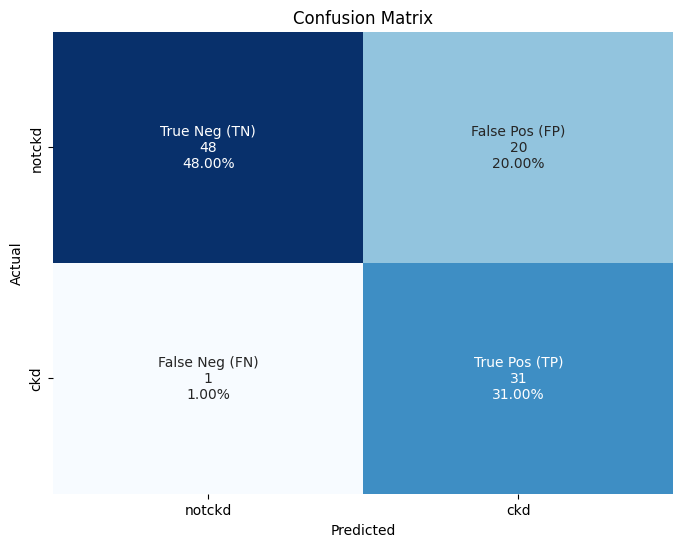

SVM Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       0.98      0.71      0.82        68
      notckd       0.61      0.97      0.75        32

    accuracy                           0.79       100
   macro avg       0.79      0.84      0.78       100
weighted avg       0.86      0.79      0.80       100



In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Support Vector Machine model with default parameters
svm = SVC(random_state=42)

# Fit the model to the training data
svm.fit(X_train, y_train)

# Predict the target values for the training set
y_pred_train_svm = svm.predict(X_train)

# Predict the target values for the test set
y_pred_test_svm = svm.predict(X_test)

# Calculate training accuracy
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
print(f"Training Accuracy for SVM: {train_accuracy_svm:.2f}")

# Calculate test accuracy
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
print(f"Test Accuracy for SVM: {test_accuracy_svm:.2f}")

# Evaluate the model on the test set
cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)

# Plot confusion matrix
plt_cm(cm_test_svm, class_names)

# Print classification report for test set
print("SVM Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_svm))


# Hyperparameter tuning along with k fold validation.

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.9933333333333334
Training Accuracy for Best SVM: 1.00
Test Accuracy for Best SVM: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


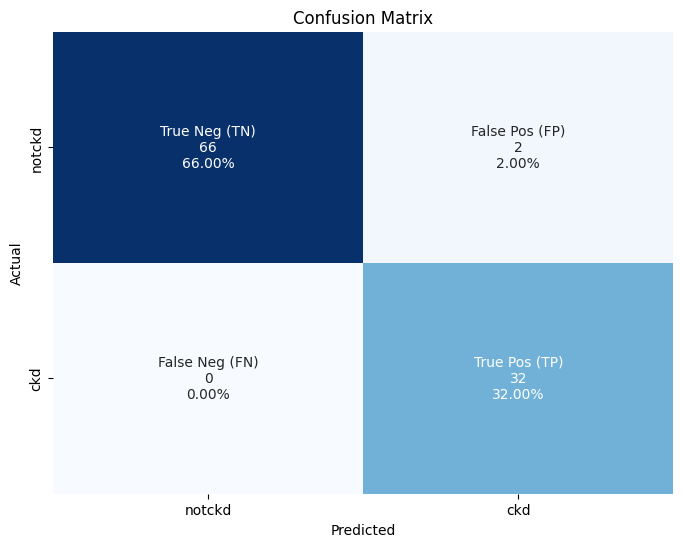

Best SVM Classification Report (Test Set):
              precision    recall  f1-score   support

         ckd       1.00      0.97      0.99        68
      notckd       0.94      1.00      0.97        32

    accuracy                           0.98       100
   macro avg       0.97      0.99      0.98       100
weighted avg       0.98      0.98      0.98       100



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

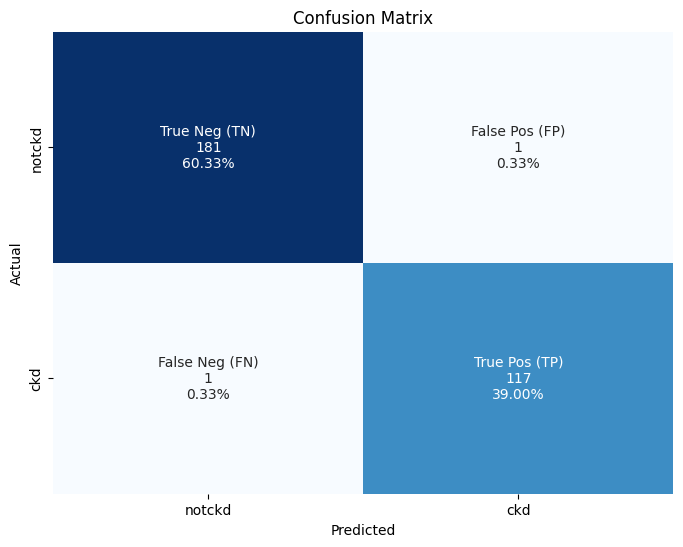

Cross-Validated Confusion Matrix for Best SVM:
[[181   1]
 [  1 117]]
Cross-Validated Classification Report for Best SVM:
              precision    recall  f1-score   support

         ckd       0.99      0.99      0.99       182
      notckd       0.99      0.99      0.99       118

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

Cross-Validated Sensitivity (Recall) for Best SVM: 0.99
Cross-Validated Specificity for Best SVM: 0.99
Best SVM Cross-validation scores: [1.         0.98333333 0.98333333 1.         1.        ]
Mean cross-validation score: 0.9933333333333334
Standard deviation of cross-validation scores: 0.008164965809277286


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Define the hyperparameters grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize the Support Vector Machine model
svm = SVC(random_state=42)

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search_svm.best_params_)
print("Best Cross-Validation Score:", grid_search_svm.best_score_)

# Use the best estimator to make predictions on the test set
best_svm = grid_search_svm.best_estimator_

# Predict on the training set
y_pred_train_svm = best_svm.predict(X_train)

# Predict on the test set
y_pred_test_svm = best_svm.predict(X_test)

# Calculate training accuracy
train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
print(f"Training Accuracy for Best SVM: {train_accuracy_svm:.2f}")

# Calculate test accuracy
test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)
print(f"Test Accuracy for Best SVM: {test_accuracy_svm:.2f}")

# Evaluate the model on the test set
cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)

# Plot confusion matrix
plt_cm(cm_test_svm, class_names)

# Print classification report for test set
print("Best SVM Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test_svm))

# Perform cross-validation prediction to get combined support
y_pred_cv_svm = cross_val_predict(best_svm, X_train, y_train, cv=5)

# Evaluate the model on the cross-validated predictions
cm_cv_svm = confusion_matrix(y_train, y_pred_cv_svm)
plt_cm(cm_cv_svm, class_names)

print("Cross-Validated Confusion Matrix for Best SVM:")
print(cm_cv_svm)

print("Cross-Validated Classification Report for Best SVM:")
print(classification_report(y_train, y_pred_cv_svm))

# Calculate sensitivity and specificity for cross-validation results
TP_cv_svm = cm_cv_svm[1, 1]  # True Positives
TN_cv_svm = cm_cv_svm[0, 0]  # True Negatives
FP_cv_svm = cm_cv_svm[0, 1]  # False Positives
FN_cv_svm = cm_cv_svm[1, 0]  # False Negatives

sensitivity_cv_svm = TP_cv_svm / (TP_cv_svm + FN_cv_svm)
specificity_cv_svm = TN_cv_svm / (TN_cv_svm + FP_cv_svm)

print(f"Cross-Validated Sensitivity (Recall) for Best SVM: {sensitivity_cv_svm:.2f}")
print(f"Cross-Validated Specificity for Best SVM: {specificity_cv_svm:.2f}")

# Print cross-validation scores for the best model
cv_scores_best_svm = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy')
print("Best SVM Cross-validation scores:", cv_scores_best_svm)
print("Mean cross-validation score:", np.mean(cv_scores_best_svm))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_svm))


# **API Creation for deployment of model**

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Assuming X_train and X_test are pandas DataFrames with feature names
# Initialize and fit the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances in descending order and get their indices
indices = np.argsort(importances)[::-1]

# Print the feature ranking with actual feature names
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature: {X_train.columns[indices[f]]} (Importance: {importances[indices[f]]:.6f})")

# Select top n features (e.g., top 10)
n = 10
top_indices = indices[:n]
top_feature_names = X_train.columns[top_indices]

print("\nTop 10 selected features:")
print(top_feature_names)

# Reduce the dataset to the selected features using .iloc for integer-based indexing
X_train_top = X_train.iloc[:, top_indices]
X_test_top = X_test.iloc[:, top_indices]

# Convert y_train to a NumPy array if it's a DataFrame/Series
y_train_array = y_train.values.ravel()

# Perform cross-validation with the reduced feature set
cv_scores_rf = cross_val_score(rf, X_train_top, y_train_array, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-validation scores:", cv_scores_rf)
print("Mean cross-validation score:", np.mean(cv_scores_rf))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_rf))

# Fit the RandomForest on the selected features
rf.fit(X_train_top, y_train_array)

# Calculate training accuracy
train_accuracy = rf.score(X_train_top, y_train_array)
print(f"\nTraining Accuracy for Random Forest (Top {n} features): {train_accuracy:.2f}")

# Predict on the test set
y_pred_rf = rf.predict(X_test_top)

# Calculate test accuracy
test_accuracy = rf.score(X_test_top, y_test)
print(f"Test Accuracy for Random Forest (Top {n} features): {test_accuracy:.2f}")

# Confusion Matrix and Classification Report
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest Confusion Matrix (Test Set):")
print(cm_rf)

print("\nRandom Forest Classification Report (Test Set):")
print(classification_report(y_test, y_pred_rf))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Feature ranking:
1. Feature: hemo (Importance: 0.255575)
2. Feature: sc (Importance: 0.173359)
3. Feature: sg (Importance: 0.151975)
4. Feature: al (Importance: 0.098615)
5. Feature: rbc (Importance: 0.062986)
6. Feature: htn (Importance: 0.059342)
7. Feature: dm (Importance: 0.045542)
8. Feature: bu (Importance: 0.033541)
9. Feature: sod (Importance: 0.026005)
10. Feature: bgr (Importance: 0.022620)
11. Feature: bp (Importance: 0.015578)
12. Feature: age (Importance: 0.012398)
13. Feature: pc (Importance: 0.009180)
14. Feature: pot (Importance: 0.008797)
15. Feature: su (Importance: 0.006097)
16. Feature: pe (Importance: 0.005588)
17. Feature: ane (Importance: 0.005203)
18. Feature: appet (Importance: 0.004082)
19. Feature: cad (Importance: 0.001381)
20. Feature: ba (Importance: 0.001106)
21. Feature: pcc (Importance: 0.001030)

Top 10 selected features:
Index(['hemo', 'sc', 'sg', 'al', 'rbc', 'htn', 'dm', 'bu', 'sod', 'bgr'], dtype='object')

Random Forest Cross-validation scores: [1

# By using Random Forest we can reduce the number of feature to 10 as they contain most of the important traints.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training Accuracy for Best Random Forest (Top 10 features): 1.00
Test Accuracy for Best Random Forest (Top 10 features): 0.99
****************************************************************************************************


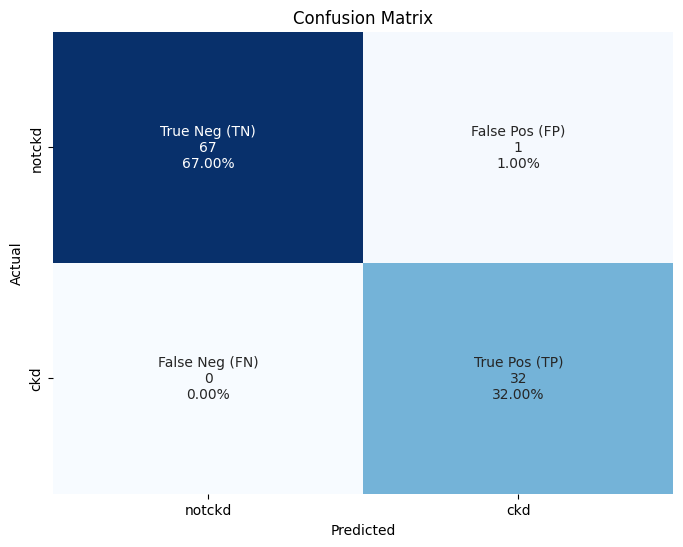

Best Random Forest Classification Report (Test Set) (Top 10 features):
              precision    recall  f1-score   support

         ckd       1.00      0.99      0.99        68
      notckd       0.97      1.00      0.98        32

    accuracy                           0.99       100
   macro avg       0.98      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

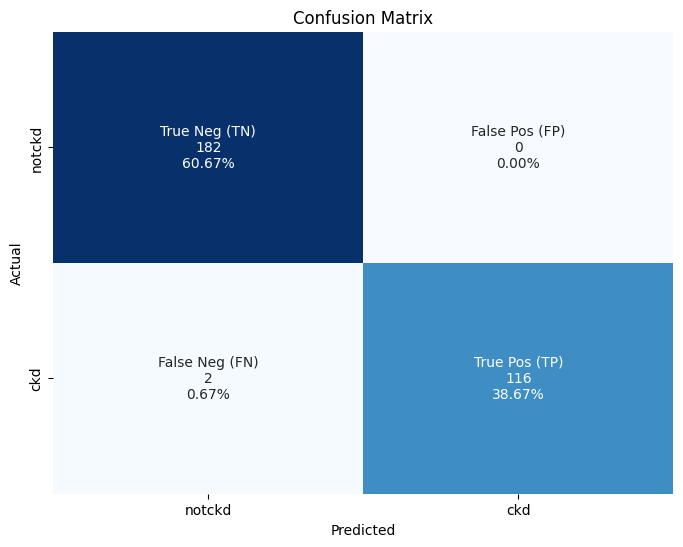

Cross-Validated Confusion Matrix for Best Random Forest (Top 10 features):
[[182   0]
 [  2 116]]
Cross-Validated Classification Report for Best Random Forest (Top 10 features):
              precision    recall  f1-score   support

         ckd       0.99      1.00      0.99       182
      notckd       1.00      0.98      0.99       118

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

****************************************************************************************************
Cross-Validated Sensitivity (Recall) for Best Random Forest (Top 10 features): 0.98
Cross-Validated Specificity for Best Random Forest (Top 10 features): 1.00
****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Random Forest Cross-validation scores (Top 10 features): [1.         1.         0.96666667 1.         1.        ]
Mean cross-validation score: 0.9933333333333334
Standard deviation of cross-validation scores: 0.01333333333333333


In [42]:
# List of top 10 important features
top_10_features = ['hemo', 'sc', 'sg', 'al', 'rbc', 'htn', 'dm', 'bu', 'sod', 'bgr']

# Reduce the training and testing datasets to these top 10 features
X_train_top = X_train[top_10_features]
X_test_top = X_test[top_10_features]

# Initialize the Random Forest model with best parameters
best_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=3,
    max_features='log2',
    max_depth=30,
    criterion='entropy',
    random_state=42
)

# Fit the model to the training data using the top 10 features
best_rf.fit(X_train_top, y_train)

# Calculate training accuracy
train_accuracy = best_rf.score(X_train_top, y_train)
print(f"Training Accuracy for Best Random Forest (Top 10 features): {train_accuracy:.2f}")

# Predict on the test set
y_pred_best_rf = best_rf.predict(X_test_top)

# Calculate test accuracy
test_accuracy = best_rf.score(X_test_top, y_test)
print(f"Test Accuracy for Best Random Forest (Top 10 features): {test_accuracy:.2f}")
print("*" * 100)

# Evaluate the model on the test set
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
plt_cm(cm_best_rf, class_names)

print("Best Random Forest Classification Report (Test Set) (Top 10 features):")
print(classification_report(y_test, y_pred_best_rf))
print("*" * 100)

# Perform cross-validation prediction to get combined support using top 10 features
y_pred_cv_best_rf = cross_val_predict(best_rf, X_train_top, y_train, cv=5)

# Evaluate the model on the combined cross-validated predictions
cm_cv_best_rf = confusion_matrix(y_train, y_pred_cv_best_rf)
plt_cm(cm_cv_best_rf, class_names)

print("Cross-Validated Confusion Matrix for Best Random Forest (Top 10 features):")
print(cm_cv_best_rf)

print("Cross-Validated Classification Report for Best Random Forest (Top 10 features):")
print(classification_report(y_train, y_pred_cv_best_rf))
print("*" * 100)

# Calculate sensitivity and specificity for cross-validation results
TP_cv_rf = cm_cv_best_rf[1, 1]  # True Positives
TN_cv_rf = cm_cv_best_rf[0, 0]  # True Negatives
FP_cv_rf = cm_cv_best_rf[0, 1]  # False Positives
FN_cv_rf = cm_cv_best_rf[1, 0]  # False Negatives

sensitivity_cv_rf = TP_cv_rf / (TP_cv_rf + FN_cv_rf)
specificity_cv_rf = TN_cv_rf / (TN_cv_rf + FP_cv_rf)

print(f"Cross-Validated Sensitivity (Recall) for Best Random Forest (Top 10 features): {sensitivity_cv_rf:.2f}")
print(f"Cross-Validated Specificity for Best Random Forest (Top 10 features): {specificity_cv_rf:.2f}")
print("*" * 100)

# Print cross-validation scores for the best model using top 10 features
cv_scores_best_rf = cross_val_score(best_rf, X_train_top, y_train, cv=5, scoring='accuracy')
print("Best Random Forest Cross-validation scores (Top 10 features):", cv_scores_best_rf)
print("Mean cross-validation score:", np.mean(cv_scores_best_rf))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_rf))


In [47]:
pip install flask-ngrok

In [48]:
cd /content/drive/MyDrive/Random_forest_api

[Errno 2] No such file or directory: '/content/drive/MyDrive/Random_forest_api'
/content


# Now we will use Logistic Regression for model building as it shows best results with its best parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Accuracy for Best Logistic Regression (Top 10 features): 0.99
Test Accuracy for Best Logistic Regression (Top 10 features): 0.97
****************************************************************************************************


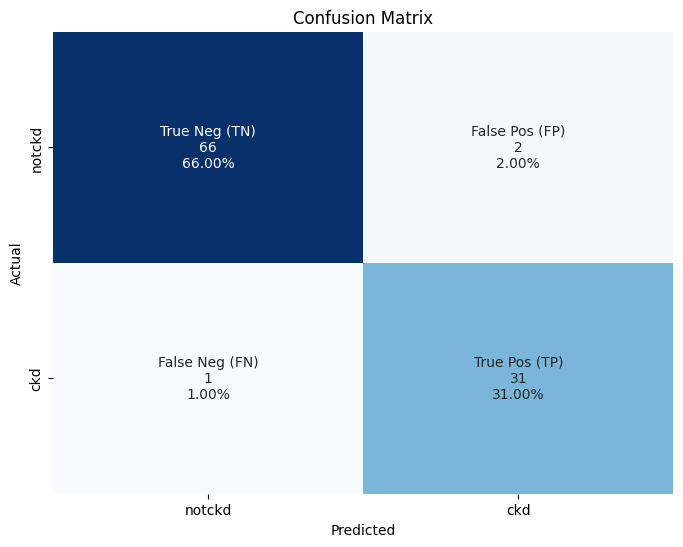

Best Logistic Regression Classification Report (Test Set) (Top 10 features):
              precision    recall  f1-score   support

         ckd       0.99      0.97      0.98        68
      notckd       0.94      0.97      0.95        32

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100

****************************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

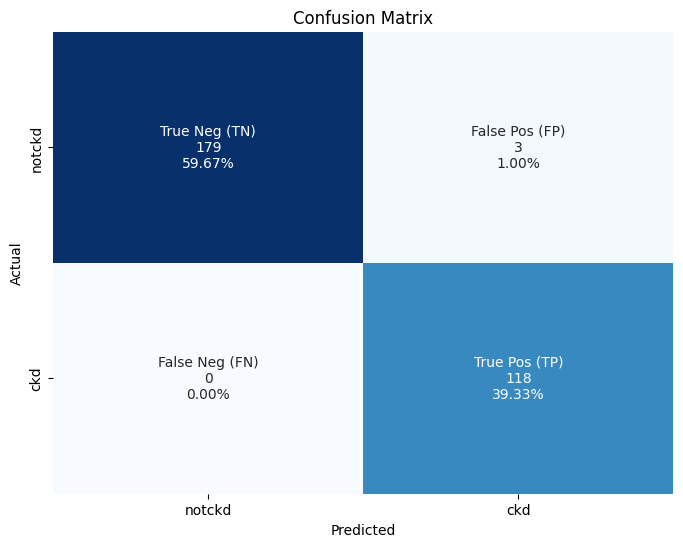

Cross-Validated Confusion Matrix for Best Logistic Regression (Top 10 features):
[[179   3]
 [  0 118]]
Cross-Validated Classification Report for Best Logistic Regression (Top 10 features):
              precision    recall  f1-score   support

         ckd       1.00      0.98      0.99       182
      notckd       0.98      1.00      0.99       118

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

****************************************************************************************************
Cross-Validated Sensitivity (Recall) for Best Logistic Regression (Top 10 features): 1.00
Cross-Validated Specificity for Best Logistic Regression (Top 10 features): 0.98
****************************************************************************************************
Best Logistic Regression Cross-validation scores (Top 10 features): [0.98333333 0.96666667 1.         1.      

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [50]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# List of top 10 important features
top_10_features = ['hemo', 'sc', 'sg', 'al', 'rbc', 'htn', 'dm', 'bu', 'sod', 'bgr']

# Reduce the training and testing datasets to these top 10 features
X_train_top = X_train[top_10_features]
X_test_top = X_test[top_10_features]

# Initialize the Logistic Regression model with best parameters
best_log_reg = LogisticRegression(
    C=1,  # Regularization strength
    solver='liblinear',  # Optimization algorithm
    random_state=42
)

# Fit the model to the training data using the top 10 features
best_log_reg.fit(X_train_top, y_train)

# Calculate training accuracy
train_accuracy = best_log_reg.score(X_train_top, y_train)
print(f"Training Accuracy for Best Logistic Regression (Top 10 features): {train_accuracy:.2f}")

# Predict on the test set
y_pred_best_log_reg = best_log_reg.predict(X_test_top)

# Calculate test accuracy
test_accuracy = best_log_reg.score(X_test_top, y_test)
print(f"Test Accuracy for Best Logistic Regression (Top 10 features): {test_accuracy:.2f}")
print("*" * 100)

# Evaluate the model on the test set
cm_best_log_reg = confusion_matrix(y_test, y_pred_best_log_reg)
plt_cm(cm_best_log_reg, class_names)  # Assuming plt_cm is defined for plotting confusion matrix

print("Best Logistic Regression Classification Report (Test Set) (Top 10 features):")
print(classification_report(y_test, y_pred_best_log_reg))
print("*" * 100)

# Perform cross-validation prediction to get combined support using top 10 features
y_pred_cv_best_log_reg = cross_val_predict(best_log_reg, X_train_top, y_train, cv=5)

# Evaluate the model on the combined cross-validated predictions
cm_cv_best_log_reg = confusion_matrix(y_train, y_pred_cv_best_log_reg)
plt_cm(cm_cv_best_log_reg, class_names)

print("Cross-Validated Confusion Matrix for Best Logistic Regression (Top 10 features):")
print(cm_cv_best_log_reg)

print("Cross-Validated Classification Report for Best Logistic Regression (Top 10 features):")
print(classification_report(y_train, y_pred_cv_best_log_reg))
print("*" * 100)

# Calculate sensitivity and specificity for cross-validation results
TP_cv_log_reg = cm_cv_best_log_reg[1, 1]  # True Positives
TN_cv_log_reg = cm_cv_best_log_reg[0, 0]  # True Negatives
FP_cv_log_reg = cm_cv_best_log_reg[0, 1]  # False Positives
FN_cv_log_reg = cm_cv_best_log_reg[1, 0]  # False Negatives

sensitivity_cv_log_reg = TP_cv_log_reg / (TP_cv_log_reg + FN_cv_log_reg)
specificity_cv_log_reg = TN_cv_log_reg / (TN_cv_log_reg + FP_cv_log_reg)

print(f"Cross-Validated Sensitivity (Recall) for Best Logistic Regression (Top 10 features): {sensitivity_cv_log_reg:.2f}")
print(f"Cross-Validated Specificity for Best Logistic Regression (Top 10 features): {specificity_cv_log_reg:.2f}")
print("*" * 100)

# Print cross-validation scores for the best model using top 10 features
cv_scores_best_log_reg = cross_val_score(best_log_reg, X_train_top, y_train, cv=5, scoring='accuracy')
print("Best Logistic Regression Cross-validation scores (Top 10 features):", cv_scores_best_log_reg)
print("Mean cross-validation score:", np.mean(cv_scores_best_log_reg))
print("Standard deviation of cross-validation scores:", np.std(cv_scores_best_log_reg))


In [51]:
import pickle
# Save the model to a pickle file
pickle_filename = 'best_log_reg.pkl'

with open(pickle_filename, 'wb') as file:
    pickle.dump(best_log_reg, file)

print(f"Model saved as {pickle_filename}")
from google.colab import files

files.download('/content/best_log_reg.pkl')  # Replace with your .pkl filename

Model saved as best_log_reg.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
cd /content/drive/MyDrive/Random_forest_api

/content/drive/MyDrive/Random_forest_api


# **By using flask along with colab we can create API on local host.**

In [59]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import pickle
import numpy as np

# Initialize the Flask application
app = Flask(__name__)
run_with_ngrok(app)  # Start ngrok when the app is run

# Load the trained model from the pickle file
model = pickle.load(open('best_log_reg.pkl', 'rb'))

# Define the top 10 features that the model expects
top_10_features = ['hemo', 'sc', 'sg', 'al', 'rbc', 'htn', 'dm', 'bu', 'sod', 'bgr']

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/getprediction', methods=['POST'])
def getprediction():
    # Get the form inputs and convert them to a list of floats
    input_data = [float(x) for x in request.form.values()]

    # Convert the input list to a NumPy array and reshape it
    final_input = np.array([input_data])

    # Make the prediction using the loaded model
    prediction = model.predict(final_input)

    # Render the result back to the 'index.html' template
    return render_template('index.html', output='Predicted Class: {}'.format(prediction[0]))

# Run the Flask app without debug=True
if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-17:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll